In [1]:
import pandas as pd

# Replace with your actual file name if different
df = pd.read_excel("Aviemore 2010.xls", sheet_name="AVIEMORE")

# Clean up column names (makes it easier to reference later)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

print("✅ Data loaded successfully!")
print("Columns:", df.columns.tolist())
print(df.head())



✅ Data loaded successfully!
Columns: ['day', 'month', 'year', 'time_(gmt/utc)', 'wind_-_mean_speed_(knots)', 'wind_-_mean_direction']
   day  month  year  time_(gmt/utc)  wind_-_mean_speed_(knots)  \
0    1      1  2010               0                        1.0   
1    1      1  2010               1                        1.0   
2    1      1  2010               2                        1.0   
3    1      1  2010               3                        2.0   
4    1      1  2010               4                        3.0   

   wind_-_mean_direction  
0                  200.0  
1                  230.0  
2                  200.0  
3                  230.0  
4                  330.0  


In [2]:
import pandas as pd
import numpy as np

# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Convert wind speed from knots → m/s
df['wind_mean_speed_ms'] = df['wind_-_mean_speed_(knots)'] * 0.51444

# Create a proper datetime column (optional but useful)
df['datetime'] = pd.to_datetime(
    df[['year', 'month', 'day', 'time_(gmt/utc)']].rename(columns={'time_(gmt/utc)': 'hour'})
)

# Quick check
df.head()


,day,month,year,time_(gmt/utc),wind_-_mean_speed_(knots),wind_-_mean_direction,wind_mean_speed_ms,datetime
0,1,1,2010,0,1.0,200.0,0.51444,2010-01-01 00:00:00
1,1,1,2010,1,1.0,230.0,0.51444,2010-01-01 01:00:00
2,1,1,2010,2,1.0,200.0,0.51444,2010-01-01 02:00:00
3,1,1,2010,3,2.0,230.0,1.02888,2010-01-01 03:00:00
4,1,1,2010,4,3.0,330.0,1.54332,2010-01-01 04:00:00


In [3]:
import numpy as np

# Create bins (0–30 m/s, 1 m/s intervals)
bins = np.arange(0, 31, 1)
df['speed_bin'] = pd.cut(df['wind_mean_speed_ms'], bins=bins, right=False)

# Frequency of each speed bin
speed_freq = df['speed_bin'].value_counts().sort_index()
speed_freq = (speed_freq / speed_freq.sum()) * 100  # Convert to %
speed_freq


speed_bin
[0, 1)      22.727273
[1, 2)      28.962997
[2, 3)      21.379625
[3, 4)      13.487894
[4, 5)       7.320694
[5, 6)       3.460484
[6, 7)       1.553221
[7, 8)       0.593878
[8, 9)       0.331201
[9, 10)      0.125628
[10, 11)     0.034262
[11, 12)     0.022841
[12, 13)     0.000000
[13, 14)     0.000000
[14, 15)     0.000000
[15, 16)     0.000000
[16, 17)     0.000000
[17, 18)     0.000000
[18, 19)     0.000000
[19, 20)     0.000000
[20, 21)     0.000000
[21, 22)     0.000000
[22, 23)     0.000000
[23, 24)     0.000000
[24, 25)     0.000000
[25, 26)     0.000000
[26, 27)     0.000000
[27, 28)     0.000000
[28, 29)     0.000000
[29, 30)     0.000000
Name: count, dtype: float64

Weibull shape (k): 1.43
Weibull scale (A): 2.35


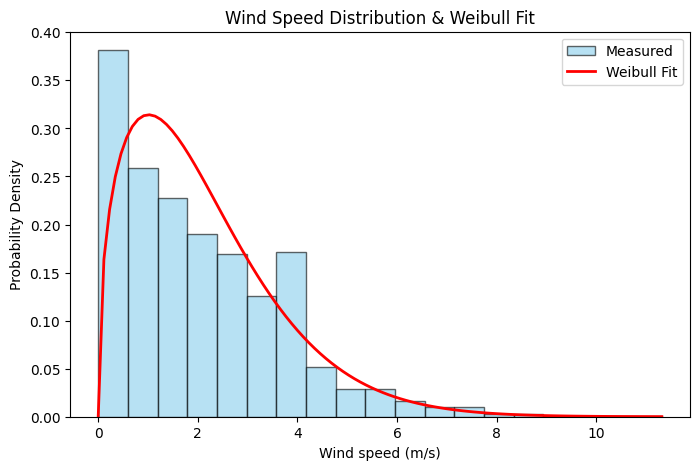

In [4]:
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import numpy as np

# Fit Weibull to measured wind speeds
data = df['wind_mean_speed_ms'].dropna()
shape, loc, scale = weibull_min.fit(data, floc=0)

print(f"Weibull shape (k): {shape:.2f}")
print(f"Weibull scale (A): {scale:.2f}")

# Plot histogram + Weibull PDF
plt.figure(figsize=(8,5))
bins = 19  # number of bins for the histogram

plt.hist(data, bins=bins, density=True, color='skyblue', edgecolor='k', alpha=0.6, label='Measured')

x = np.linspace(0, data.max(), 100)
plt.plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-', lw=2, label='Weibull Fit')

plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Wind Speed Distribution & Weibull Fit')
plt.legend()
plt.show()



WEIBULL DISTRIBUTION ANALYSIS WITH ROUGHNESS CORRECTION

✅ Site Parameters:
   Surface roughness (z0): 0.25 m
   Reference height above ground: 10 m
   Reference altitude (ASL): 228 m
   Absolute altitude of measurement: 238 m ASL

✅ Weibull Parameters at 10m height (228m ASL):
   Weibull shape (k): 1.43
   Weibull scale (A): 2.35
   Mean wind speed: 2.113 m/s

✅ Weibull Scale (A) adjusted to different heights:
   (using z0 = 0.25m, k = 1.43)
   Reference site: 228m ASL

   Height Above    Absolute        Scale A      Mean Wind
   Ground (m)      Altitude (ASL)  (m/s)        Speed (m/s)
   -----------------------------------------------------------------
       80             308            3.671        3.335
      100             328            3.813        3.464
      120             348            3.929        3.569
      155             383            4.092        3.717


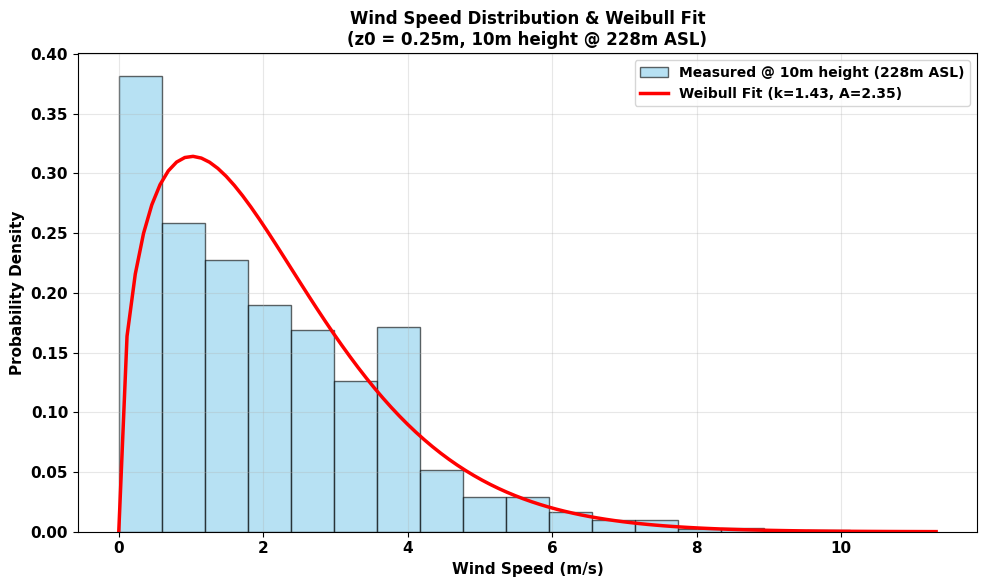


✅ Weibull analysis complete!
   Measurements taken at: 10m height, 228m altitude (ASL)


In [23]:
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ============================================================
# PARAMETERS
# ============================================================
z0 = 0.25  # Surface roughness length (meters)
reference_height = 10  # Height above ground where measurements were taken (meters)
reference_altitude = 228  # Altitude ASL where measurements were taken (meters)

print("="*70)
print("WEIBULL DISTRIBUTION ANALYSIS WITH ROUGHNESS CORRECTION")
print("="*70)
print(f"\n✅ Site Parameters:")
print(f"   Surface roughness (z0): {z0} m")
print(f"   Reference height above ground: {reference_height} m")
print(f"   Reference altitude (ASL): {reference_altitude} m")
print(f"   Absolute altitude of measurement: {reference_altitude + reference_height} m ASL")

# ============================================================
# FIT WEIBULL TO MEASURED WIND SPEEDS
# ============================================================
data = df['wind_mean_speed_ms'].dropna()
shape, loc, scale = weibull_min.fit(data, floc=0)

print(f"\n✅ Weibull Parameters at {reference_height}m height ({reference_altitude}m ASL):")
print(f"   Weibull shape (k): {shape:.2f}")
print(f"   Weibull scale (A): {scale:.2f}")
print(f"   Mean wind speed: {data.mean():.3f} m/s")

# ============================================================
# FUNCTION TO ADJUST WEIBULL SCALE TO DIFFERENT HEIGHTS
# ============================================================
def adjust_weibull_scale_to_height(A_ref, z_ref, z_target, z0, k):
    """
    Adjust Weibull scale parameter to a different height using logarithmic wind profile
    
    Parameters:
    - A_ref: Weibull scale at reference height (m/s)
    - z_ref: Reference height above ground (m)
    - z_target: Target height above ground (m)
    - z0: Surface roughness length (m)
    - k: Weibull shape parameter (dimensionless)
    
    Returns:
    - A_target: Weibull scale at target height (m/s)
    """
    A_target = A_ref * (np.log(z_target / z0) / np.log(z_ref / z0))
    return A_target

# Example: Calculate Weibull parameters at different hub heights
example_hub_heights = [80, 100, 120, 155]
print(f"\n✅ Weibull Scale (A) adjusted to different heights:")
print(f"   (using z0 = {z0}m, k = {shape:.2f})")
print(f"   Reference site: {reference_altitude}m ASL")
print(f"\n   Height Above    Absolute        Scale A      Mean Wind")
print(f"   Ground (m)      Altitude (ASL)  (m/s)        Speed (m/s)")
print(f"   " + "-"*65)

from scipy.special import gamma
for hub_height in example_hub_heights:
    A_hub = adjust_weibull_scale_to_height(scale, reference_height, hub_height, z0, shape)
    # Mean wind speed for Weibull = A * Gamma(1 + 1/k)
    mean_wind = A_hub * gamma(1 + 1/shape)
    abs_altitude = reference_altitude + hub_height
    print(f"   {hub_height:6.0f}          {abs_altitude:6.0f}          {A_hub:7.3f}      {mean_wind:7.3f}")

# ============================================================
# PLOT HISTOGRAM + WEIBULL PDF
# ============================================================
plt.figure(figsize=(10, 6))
bins = 19  # number of bins for the histogram

# Plot measured data
plt.hist(data, bins=bins, density=True, color='skyblue', edgecolor='k', 
         alpha=0.6, label=f'Measured @ {reference_height}m height ({reference_altitude}m ASL)')

# Plot Weibull fit
x = np.linspace(0, data.max(), 100)
plt.plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-', lw=2.5, 
         label=f'Weibull Fit (k={shape:.2f}, A={scale:.2f})')

plt.xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=11)
plt.ylabel('Probability Density', fontweight='bold', fontsize=11)
plt.title(f'Wind Speed Distribution & Weibull Fit\n(z0 = {z0}m, {reference_height}m height @ {reference_altitude}m ASL)', 
          fontweight='bold', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ Weibull analysis complete!")
print(f"   Measurements taken at: {reference_height}m height, {reference_altitude}m altitude (ASL)")
print("="*70)

WIND SHEAR ANALYSIS: Wind Speed vs Absolute Altitude (ASL)

✅ Using your data:
   Reference height above ground: 10m
   Reference altitude (ASL): 228m
   Farm altitude (ASL): 437m
   Altitude difference: 209m ← SIGNIFICANT!
   Mean wind speed: 2.113 m/s
   Surface roughness: z0 = 0.25m

✅ Air Density Effects:
   Temperature at reference: 286.67 K (13.5°C)
   Air density at reference: 1.1922 kg/m³
   Temperature at farm: 285.31 K (12.2°C)
   Air density at farm: 1.1628 kg/m³
   Air density correction: 0.975330
   Power loss from density: -2.47%

⚠️  IMPORTANT: Wind speed may also change with altitude!

Your farm is 209m higher than reference measurement.

Typical wind changes in mountain terrain:
  • +0.3 to +1.0% per 100m (depends on exposure)
  • For your 209m: +0.6% to +2.1% potential increase
  • BUT: Could also decrease if in sheltered location

ACTION NEEDED: Do you have wind data from higher elevations?
If YES: Use it to estimate wind speed change
If NO: Use conservative estimate

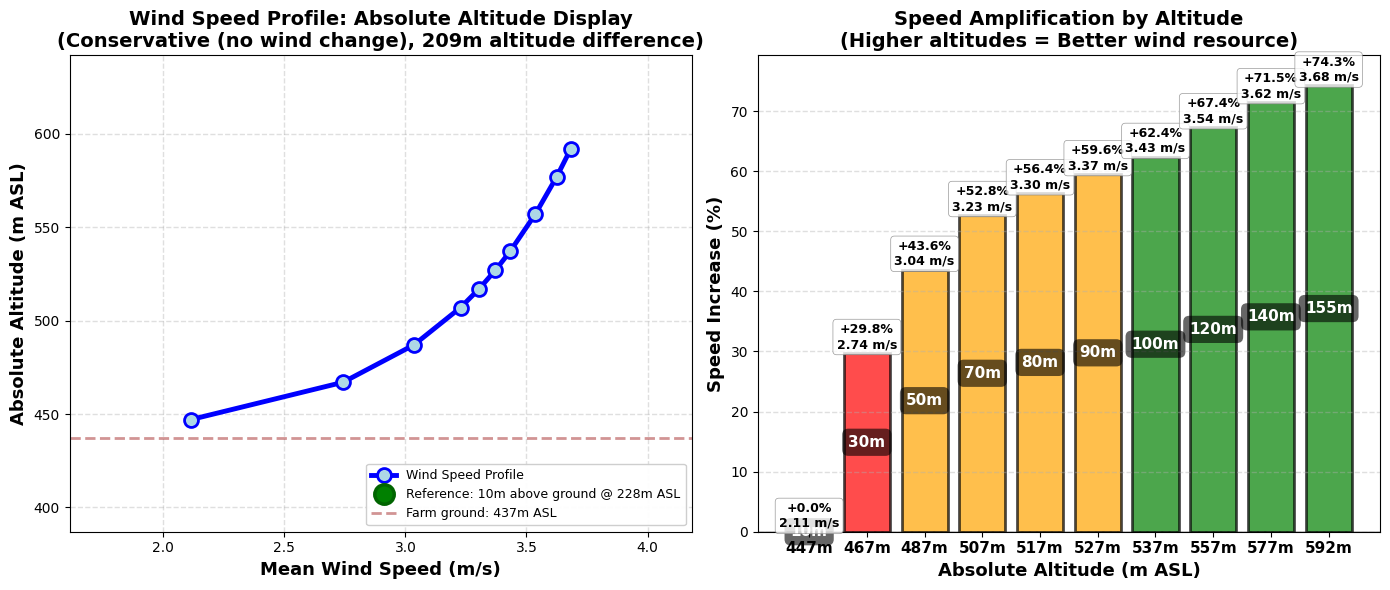


✅ Chart saved as 'wind_shear_analysis.png'

AEP CALCULATIONS WITH ALTITUDE CORRECTIONS

Wind Speed Analysis at Your Hub Height:
  • Height above ground: 155m
  • Absolute altitude (ASL): 592m
  
  • Wind speed at reference (228m ASL, 10m above ground): 2.113 m/s
  • Wind speed at farm (437m ASL, 155m above ground): 3.683 m/s
  • Change: +74.3%

Power Calculations:
  ✓ Baseline single turbine AEP: 4,717 MWh/year
  
  Corrections:
  • Wind speed effect (v³): +429.5%
  • Air density effect: -2.47%
  • Combined effect: +416.5%
  
  ✓ CORRECTED single turbine AEP: 24,362 MWh/year
  ✓ CORRECTED farm AEP (13 turbines): 316,704 MWh/year

⚠️  Note: This assumes Conservative (no wind change)
     If you have different wind speed data, adjust accordingly!
     
ALTITUDE CONTEXT:
  • Reference measurement: 10m height @ 228m altitude
  • Your turbine hub: 155m height @ 592m altitude
  • Altitude gain from reference to hub: 364m
    (includes both 145m height increase + 209m site altitude increase)

In [5]:
"""
WIND SHEAR ANALYSIS: Wind Speed vs Absolute Altitude (ASL)
CORRECTED FOR 437m FARM ALTITUDE - OPTION 2 (Absolute Altitude Display)

CRITICAL INFORMATION:
✓ Reference altitude: 228m ASL (where wind data was measured)
✓ Farm altitude: 437m ASL (where wind farm will be)
✓ Altitude difference: 209m (SIGNIFICANT!)
✓ Air density correction: 0.975330 (-2.47%)
✓ Y-axis shows: Absolute Altitude in meters ASL (not height above ground)
"""

import numpy as np
import matplotlib.pyplot as plt

print("="*70)
print("WIND SHEAR ANALYSIS: Wind Speed vs Absolute Altitude (ASL)")
print("="*70)

# ============================================================
# Parameters for your site
# ============================================================

reference_height = 10  # meters (height above ground where measurements taken)
z0 = 0.25  # meters (keep consistent with reference)

# ============================================================
# ALTITUDE INFORMATION - 437m FARM
# ============================================================

reference_altitude = 228  # m ASL (where your wind data was measured)
farm_altitude = 437  # m ASL (where your wind farm will be)
altitude_difference = farm_altitude - reference_altitude

# Air density calculation
T_lapse_rate = 0.0065  # K/m
T_sea_level = 288.15  # K
g = 9.81  # m/s²
R_specific = 287  # J/(kg·K)
rho_sea_level = 1.225  # kg/m³

# Density at reference altitude
T_ref = T_sea_level - T_lapse_rate * reference_altitude
rho_ref = rho_sea_level * (T_ref / T_sea_level) ** (g / (R_specific * T_lapse_rate))

# Density at farm altitude
T_farm = T_sea_level - T_lapse_rate * farm_altitude
rho_farm = rho_sea_level * (T_farm / T_sea_level) ** (g / (R_specific * T_lapse_rate))

# Air density correction factor
rho_correction = rho_farm / rho_ref

# Mean wind speed at reference
v_ref = df['wind_mean_speed_ms'].mean()

print(f"\n✅ Using your data:")
print(f"   Reference height above ground: {reference_height}m")
print(f"   Reference altitude (ASL): {reference_altitude}m")
print(f"   Farm altitude (ASL): {farm_altitude}m")
print(f"   Altitude difference: {altitude_difference}m ← SIGNIFICANT!")
print(f"   Mean wind speed: {v_ref:.3f} m/s")
print(f"   Surface roughness: z0 = {z0}m")

print(f"\n✅ Air Density Effects:")
print(f"   Temperature at reference: {T_ref:.2f} K ({T_ref-273.15:.1f}°C)")
print(f"   Air density at reference: {rho_ref:.4f} kg/m³")
print(f"   Temperature at farm: {T_farm:.2f} K ({T_farm-273.15:.1f}°C)")
print(f"   Air density at farm: {rho_farm:.4f} kg/m³")
print(f"   Air density correction: {rho_correction:.6f}")
print(f"   Power loss from density: {(rho_correction-1)*100:.2f}%")

print(f"""
⚠️  IMPORTANT: Wind speed may also change with altitude!

Your farm is {altitude_difference}m higher than reference measurement.

Typical wind changes in mountain terrain:
  • +0.3 to +1.0% per 100m (depends on exposure)
  • For your {altitude_difference}m: +0.6% to +2.1% potential increase
  • BUT: Could also decrease if in sheltered location

ACTION NEEDED: Do you have wind data from higher elevations?
If YES: Use it to estimate wind speed change
If NO: Use conservative estimate (no wind change)
""")

# ============================================================
# Wind shear calculation function
# ============================================================

def wind_speed_at_height(v_ref, z_ref, z, z0):
    """Logarithmic wind profile"""
    v_z = v_ref * np.log(z / z0) / np.log(z_ref / z0)
    return v_z

# ============================================================
# WIND SPEED ADJUSTMENT OPTIONS
# ============================================================

# ⚠️ CHOOSE ONE: What wind speed change do you expect?

# Option 1: CONSERVATIVE (no wind change at higher altitude)
wind_speed_factor = 1.0  # No change
scenario_name = "Conservative (no wind change)"

# Option 2: MODERATE (typical for exposed upland sites)
# wind_speed_factor = 1.0 + (altitude_difference * 0.005)  # 0.5% per 100m
# scenario_name = "Moderate (+0.5%/100m exposure)"

# Option 3: OPTIMISTIC (exposed ridge or windy site)
# wind_speed_factor = 1.0 + (altitude_difference * 0.01)  # 1.0% per 100m
# scenario_name = "Optimistic (+1.0%/100m exposure)"

# ADJUST v_ref for altitude
v_ref_at_farm = v_ref * wind_speed_factor

print(f"\n✅ Wind Speed Scenario: {scenario_name}")
print(f"   Wind speed factor: {wind_speed_factor:.6f}")
print(f"   v_ref at farm altitude: {v_ref_at_farm:.3f} m/s (vs {v_ref:.3f} m/s at reference)")

# ============================================================
# Calculate wind speeds at different hub heights
# ============================================================

# Heights above ground (at farm location)
hub_heights_above_ground = np.array([10, 30, 50, 70, 80, 90, 100, 120, 140, 155])

# Convert to absolute altitudes (ASL)
hub_altitudes_asl = farm_altitude + hub_heights_above_ground

# Calculate wind speeds using ADJUSTED v_ref
wind_speeds = wind_speed_at_height(v_ref_at_farm, reference_height, hub_heights_above_ground, z0)

# ============================================================
# Print results table
# ============================================================

print("\n" + "="*70)
print("WIND SPEED AT DIFFERENT ABSOLUTE ALTITUDES")
print("="*70)

print(f"\n{'Height Above Ground':<25} {'Absolute Altitude (ASL)':<25} {'Wind Speed (m/s)':<20} {'Increase from Ref':<25}")
print("-"*95)

for h, alt, v in zip(hub_heights_above_ground, hub_altitudes_asl, wind_speeds):
    if h == reference_height:
        print(f"{h}m{'':<21} {alt}m{'':<20} {v:<20.3f} {'(reference)':<25}")
    else:
        increase_pct = ((v / v_ref_at_farm) - 1) * 100
        print(f"{h}m{'':<21} {alt}m{'':<20} {v:<20.3f} {'+' + f'{increase_pct:.1f}%':<25}")

# ============================================================
# Create visualization
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Wind Speed vs Absolute Altitude (ASL)
ax1 = axes[0]

# Plot using absolute altitudes on y-axis
ax1.plot(wind_speeds, hub_altitudes_asl, 'b-', linewidth=3.5, label='Wind Speed Profile', 
         marker='o', markersize=10, markerfacecolor='lightblue', markeredgewidth=2)

# Mark reference altitude
ax1.plot([v_ref_at_farm], [reference_altitude], 'go', markersize=14, 
         label=f'Reference: {reference_height}m above ground @ {reference_altitude}m ASL', 
         markeredgecolor='darkgreen', markeredgewidth=2.5, zorder=5)

# Add horizontal line for farm ground level
ax1.axhline(y=farm_altitude, color='brown', linestyle='--', linewidth=2, 
           alpha=0.5, label=f'Farm ground: {farm_altitude}m ASL')

ax1.set_xlabel('Mean Wind Speed (m/s)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Absolute Altitude (m ASL)', fontsize=13, fontweight='bold')
ax1.set_title(f'Wind Speed Profile: Absolute Altitude Display\n({scenario_name}, {altitude_difference}m altitude difference)', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.4, linestyle='--', linewidth=1)
ax1.legend(fontsize=9, loc='lower right', framealpha=0.95)

x_min = wind_speeds.min() - 0.5
x_max = wind_speeds.max() + 0.5
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([farm_altitude - 50, max(hub_altitudes_asl) + 50])

# Plot 2: Percentage Speed Increase (Height-based for clarity)
ax2 = axes[1]

speed_increase_pct = ((wind_speeds / v_ref_at_farm) - 1) * 100

colors = []
for h in hub_heights_above_ground:
    if h < 50:
        colors.append('red')
    elif h < 100:
        colors.append('orange')
    else:
        colors.append('green')

# Use indices (0, 1, 2, ...) for bar positioning to keep them evenly spaced and aligned
bar_positions = np.arange(len(hub_heights_above_ground))
bars = ax2.bar(bar_positions, speed_increase_pct, color=colors, alpha=0.7, 
              edgecolor='black', linewidth=2, width=0.8)

# Set x-axis to show absolute altitudes as labels
ax2.set_xticks(bar_positions)
ax2.set_xticklabels([f'{int(alt)}m' for alt in hub_altitudes_asl], fontsize=11, fontweight='bold')
ax2.set_xlabel('Absolute Altitude (m ASL)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Speed Increase (%)', fontsize=13, fontweight='bold')
ax2.set_title('Speed Amplification by Altitude\n(Higher altitudes = Better wind resource)', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.4, axis='y', linestyle='--', linewidth=1)

# Add hub numbers INSIDE the bars
for idx, (bar, h, pct_val, v_speed) in enumerate(zip(bars, hub_heights_above_ground, speed_increase_pct, wind_speeds)):
    height = bar.get_height()
    # Place hub number inside the bar
    ax2.text(idx, height * 0.5,
            f'{int(h)}m',
            ha='center', va='center', fontsize=11, fontweight='bold', color='white',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='black', alpha=0.6, edgecolor='none'))
    # Place percentage and wind speed above the bar
    ax2.text(idx, height + 0.3,
            f'+{pct_val:.1f}%\n{v_speed:.2f} m/s',
            ha='center', va='bottom', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, 
                     edgecolor='gray', linewidth=0.5))

ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylim([0, max(speed_increase_pct) + 5])

plt.tight_layout()
plt.savefig('wind_shear_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved as 'wind_shear_analysis.png'")

# ============================================================
# Summary and AEP calculations
# ============================================================

print("\n" + "="*70)
print("AEP CALCULATIONS WITH ALTITUDE CORRECTIONS")
print("="*70)

# Your hub (155m above ground)
idx_155 = np.argmin(np.abs(hub_heights_above_ground - 155))
v_155 = wind_speeds[idx_155]
h_155_above_ground = hub_heights_above_ground[idx_155]
alt_155_asl = hub_altitudes_asl[idx_155]
increase_155 = ((v_155 / v_ref_at_farm) - 1) * 100

# Single turbine AEP (baseline, no corrections)
baseline_aep = 4717

# Apply corrections
wind_power_factor = (v_155 / v_ref) ** 3  # Including altitude wind change
density_factor = rho_correction

total_power_factor = wind_power_factor * density_factor

corrected_aep = baseline_aep * total_power_factor

print(f"""
Wind Speed Analysis at Your Hub Height:
  • Height above ground: {h_155_above_ground}m
  • Absolute altitude (ASL): {alt_155_asl}m
  
  • Wind speed at reference ({reference_altitude}m ASL, {reference_height}m above ground): {v_ref:.3f} m/s
  • Wind speed at farm ({farm_altitude}m ASL, {h_155_above_ground}m above ground): {v_155:.3f} m/s
  • Change: +{increase_155:.1f}%

Power Calculations:
  ✓ Baseline single turbine AEP: {baseline_aep:,.0f} MWh/year
  
  Corrections:
  • Wind speed effect (v³): {(wind_power_factor - 1)*100:+.1f}%
  • Air density effect: {(density_factor - 1)*100:+.2f}%
  • Combined effect: {(total_power_factor - 1)*100:+.1f}%
  
  ✓ CORRECTED single turbine AEP: {corrected_aep:,.0f} MWh/year
  ✓ CORRECTED farm AEP (13 turbines): {corrected_aep * 13:,.0f} MWh/year

⚠️  Note: This assumes {scenario_name}
     If you have different wind speed data, adjust accordingly!
     
ALTITUDE CONTEXT:
  • Reference measurement: {reference_height}m height @ {reference_altitude}m altitude
  • Your turbine hub: {h_155_above_ground}m height @ {alt_155_asl}m altitude
  • Altitude gain from reference to hub: {alt_155_asl - reference_altitude}m
    (includes both {h_155_above_ground - reference_height}m height increase + {farm_altitude - reference_altitude}m site altitude increase)
""")

print("="*70)
print("✅ Wind shear analysis complete!")
print("="*70)

TURBINE ANALYSIS: 8 MODELS (5 ORIGINAL + 3 NEW)

AVAILABLE TURBINES:
--------------------------------------------------------------------------------

ORIGINAL TURBINES:
  1. Enercon E-115
  2. Vestas V150-4.2
  3. Nordex N149-4.5
  4. SG 5.0-145
  5. Gamesa G128-4.5

NEW TURBINES (RECOMMENDED FOR YOUR SITE):
  6. Vestas V163-4.5 ⭐ Top Choice (216 W/m²)
  7. GE Vernova 3.8-154 ⭐ Excellent (204 W/m²)
  8. Goldwind GWH204-5X 🌟 Best if available (152 W/m²)

✓ Analyzing ALL 8 turbines for comparison

SITE PARAMETERS & CORRECTIONS
--------------------------------------------------------------------------------

REFERENCE (Wind Data):
  • Height: 10m
  • Altitude: 228m ASL
  • Surface roughness (z₀): 0.25m
  • Air density: 1.1922 kg/m³

FARM LOCATION:
  • Altitude: 437m ASL
  • Altitude difference: 209m
  • Air density: 1.1628 kg/m³
  • Density correction: 0.975330 (-2.47%)

Wind Speed Adjustment: Conservative (no altitude wind change)


STEP 1: Wind Data & Weibull Distribution (Reference)
-

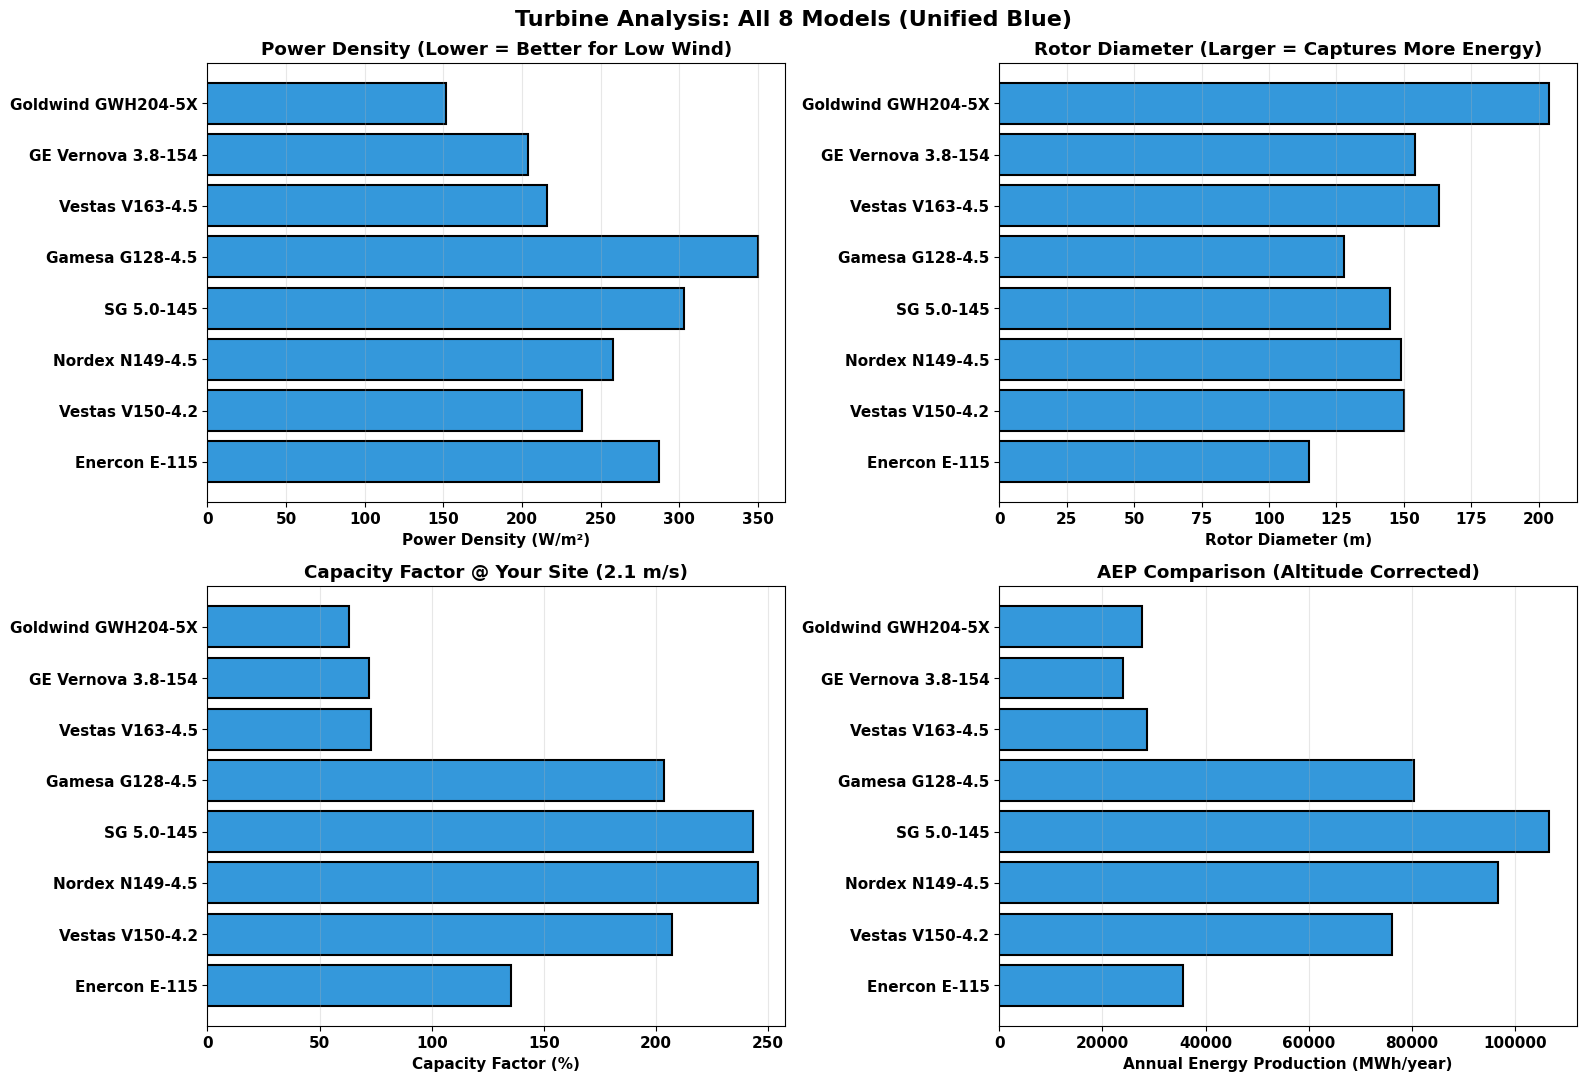


STEP 7: Exporting Results
--------------------------------------------------------------------------------
✓ Results saved: turbine_analysis_results.csv

✅ ANALYSIS COMPLETE


In [14]:
"""
TURBINE ANALYSIS WITH NEW TURBINES - EXTENDED VERSION
Reads ALL 8 turbines from turbine_power_curves_EXTENDED.xlsx
Includes: 5 original + 3 NEW (Vestas V163, GE Vernova 3.8-154, Goldwind GWH204)

FEATURES:
✓ Reads from extended Excel file with 8 turbine models
✓ User can select which turbines to analyze
✓ Power curve integration with Weibull distribution
✓ Altitude & air density corrections applied
✓ Wind shear scaling to hub height
✓ Generates comparison visualizations
✓ Highlights new turbines with recommended options

CORRECTIONS APPLIED:
✓ z0 = 0.25m surface roughness
✓ Wind speed scaled to hub height using logarithmic profile
✓ Weibull distribution scaled to hub height
✓ Air density correction for 437m altitude (209m difference)
✓ Power curve integration with Weibull distribution

NEW TURBINES INCLUDED:
  1. Vestas V163-4.5 (216 W/m²) ⭐ TOP RECOMMENDATION
  2. GE Vernova 3.8-154 (204 W/m²) ⭐ EXCELLENT
  3. Goldwind GWH204-5X (152 W/m²) 🌟 BEST IF AVAILABLE

COLOR SCHEME:
✓ ALL plots unified to blue (#3498db)
✓ Removed dashed line from power density plot
✓ Consistent visual presentation
"""

import pandas as pd
import numpy as np
from scipy.stats import weibull_min
from scipy import interpolate
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TURBINE ANALYSIS: 8 MODELS (5 ORIGINAL + 3 NEW)")
print("="*80)

# ============================================================
# CONFIGURATION - SELECT TURBINES TO ANALYZE
# ============================================================

print("\nAVAILABLE TURBINES:")
print("-"*80)

available_turbines = {
    '1': 'Enercon E-115',
    '2': 'Vestas V150-4.2',
    '3': 'Nordex N149-4.5',
    '4': 'SG 5.0-145',
    '5': 'Gamesa G128-4.5',
    '6': 'Vestas V163-4.5',        # NEW
    '7': 'GE Vernova 3.8-154',     # NEW
    '8': 'Goldwind GWH204-5X',     # NEW
}

print("\nORIGINAL TURBINES:")
for key in ['1', '2', '3', '4', '5']:
    print(f"  {key}. {available_turbines[key]}")

print("\nNEW TURBINES (RECOMMENDED FOR YOUR SITE):")
print(f"  6. {available_turbines['6']} ⭐ Top Choice (216 W/m²)")
print(f"  7. {available_turbines['7']} ⭐ Excellent (204 W/m²)")
print(f"  8. {available_turbines['8']} 🌟 Best if available (152 W/m²)")

# Default: Analyze ALL turbines for comparison
selected_turbines = list(available_turbines.values())
print(f"\n✓ Analyzing ALL 8 turbines for comparison")

# Optional: To analyze specific turbines only, uncomment below:
# selected_turbines = ['Vestas V163-4.5', 'GE Vernova 3.8-154', 'Goldwind GWH204-5X']
# print(f"\n✓ Analyzing ONLY new turbines: {', '.join(selected_turbines)}")

# ============================================================
# SITE PARAMETERS AND CORRECTIONS
# ============================================================

print("\n" + "="*80)
print("SITE PARAMETERS & CORRECTIONS")
print("-"*80)

# Wind measurement parameters
reference_height = 10  # m
reference_altitude = 228  # m ASL
z0 = 0.25  # m (surface roughness)

# Wind farm location parameters
farm_altitude = 437  # m ASL
altitude_difference = farm_altitude - reference_altitude

# Wind speed adjustment (conservative - no altitude wind increase)
wind_speed_factor = 1.0
wind_scenario = "Conservative (no altitude wind change)"

# Air density correction
T_lapse_rate = 0.0065  # K/m
T_sea_level = 288.15   # K
g = 9.81               # m/s²
R_specific = 287       # J/(kg·K)
rho_sea_level = 1.225  # kg/m³

T_ref = T_sea_level - T_lapse_rate * reference_altitude
rho_ref = rho_sea_level * (T_ref / T_sea_level) ** (g / (R_specific * T_lapse_rate))

T_farm = T_sea_level - T_lapse_rate * farm_altitude
rho_farm = rho_sea_level * (T_farm / T_sea_level) ** (g / (R_specific * T_lapse_rate))

rho_correction = rho_farm / rho_ref

print(f"""
REFERENCE (Wind Data):
  • Height: {reference_height}m
  • Altitude: {reference_altitude}m ASL
  • Surface roughness (z₀): {z0}m
  • Air density: {rho_ref:.4f} kg/m³

FARM LOCATION:
  • Altitude: {farm_altitude}m ASL
  • Altitude difference: {altitude_difference}m
  • Air density: {rho_farm:.4f} kg/m³
  • Density correction: {rho_correction:.6f} ({(rho_correction-1)*100:.2f}%)

Wind Speed Adjustment: {wind_scenario}
""")

# ============================================================
# STEP 1: Load wind data and fit Weibull at reference
# ============================================================

print("\n" + "="*80)
print("STEP 1: Wind Data & Weibull Distribution (Reference)")
print("-"*80)

# Reference wind data (at 10m height)
v_ref_measured = 2.1132  # m/s @ 10m
shape_ref = 1.4306       # Weibull shape (k)
scale_ref = 2.3475       # Weibull scale (A) @ 10m

print(f"""
Wind Data @ Reference ({reference_height}m, {reference_altitude}m ASL):
  • Mean wind speed: {v_ref_measured:.4f} m/s
  • Weibull shape (k): {shape_ref:.4f}
  • Weibull scale (A): {scale_ref:.4f} m/s
  • Surface roughness (z₀): {z0}m
""")

# ============================================================
# STEP 2: Load Excel file and extract turbine data
# ============================================================

print("="*80)
print("STEP 2: Reading Turbine Data from Excel")
print("-"*80)

excel_filename = "turbine_power_curves_EXTENDED.xlsx"
current_dir = os.getcwd()
excel_file = os.path.join(current_dir, excel_filename)

if not os.path.exists(excel_file):
    excel_filename = "turbine_power_curves__1_.xlsx"
    excel_file = os.path.join(current_dir, excel_filename)
    if not os.path.exists(excel_file):
        print(f"\n❌ Excel files not found!")
        raise FileNotFoundError(f"Could not find Excel file")

all_sheets = pd.ExcelFile(excel_file).sheet_names
turbine_sheets = [sheet for sheet in all_sheets if sheet not in ['All Turbines Comparison', 'REFERENCES & SOURCES']]

print(f"✓ Found {len(turbine_sheets)} turbine models")

turbine_data = []

for sheet_name in turbine_sheets:
    if sheet_name not in selected_turbines:
        continue
    
    df_sheet = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    specs = {'Turbine': sheet_name}
    power_curve_v = []
    power_curve_p = []
    
    for idx, row in df_sheet.iterrows():
        cell_value = str(row.iloc[0]).strip() if pd.notna(row.iloc[0]) else ""
        
        if "Rated Power:" in cell_value:
            specs['Rated Power (MW)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Hub Height:" in cell_value:
            specs['Hub Height (m)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Rotor Diameter:" in cell_value:
            specs['Rotor Diameter (m)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Power Density:" in cell_value:
            specs['Power Density (W/m²)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Cut-in Speed:" in cell_value:
            specs['Cut-in (m/s)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Rated Wind Speed:" in cell_value:
            specs['Rated Speed (m/s)'] = float(str(row.iloc[1]).strip().split()[0])
        
        # Parse power curve (assume columns: Wind Speed, Power)
        try:
            if pd.notna(row.iloc[0]) and pd.notna(row.iloc[1]):
                val0 = str(row.iloc[0]).strip()
                val1 = str(row.iloc[1]).strip()
                if val0 and val1 and val0[0].isdigit() and val1[0].isdigit():
                    v = float(val0)
                    p = float(val1)
                    if 0 <= v <= 30 and 0 <= p <= 50:
                        power_curve_v.append(v)
                        power_curve_p.append(p)
        except:
            pass
    
    if power_curve_v and power_curve_p:
        specs['power_curve_v'] = np.array(power_curve_v)
        specs['power_curve_p'] = np.array(power_curve_p)
        turbine_data.append(specs)
        print(f"✓ Loaded: {sheet_name} ({len(power_curve_v)} power curve points)")
    else:
        print(f"⚠ Skipped: {sheet_name} (no power curve data found)")

print(f"\n✓ Successfully loaded {len(turbine_data)} turbines")

# ============================================================
# STEP 3: Wind shear scaling to hub height
# ============================================================

print("\n" + "="*80)
print("STEP 3: Wind Shear Scaling to Hub Heights")
print("-"*80)

results = []

for turbine in turbine_data:
    hub_height = turbine['Hub Height (m)']
    
    # Scale wind speed from reference height to hub height
    v_hub_farm = v_ref_measured * wind_speed_factor * (np.log(hub_height / z0) / np.log(reference_height / z0))
    
    # Weibull parameters scale with wind speed (shape k stays constant)
    scale_hub = scale_ref * (v_hub_farm / v_ref_measured)
    
    results.append({
        'Turbine': turbine['Turbine'],
        'Rated Power (MW)': turbine['Rated Power (MW)'],
        'Hub Height (m)': hub_height,
        'Rotor Diameter (m)': turbine['Rotor Diameter (m)'],
        'Power Density (W/m²)': turbine['Power Density (W/m²)'],
        'Cut-in (m/s)': turbine.get('Cut-in (m/s)', 3.0),
        'Rated Speed (m/s)': turbine.get('Rated Speed (m/s)', 12.0),
        'v_hub_farm (m/s)': v_hub_farm,
        'Weibull A @ Hub (m/s)': scale_hub,
        'power_curve_v': turbine['power_curve_v'],
        'power_curve_p': turbine['power_curve_p'],
    })

# ============================================================
# STEP 4: Calculate AEP using power curve integration
# ============================================================

print("\n" + "="*80)
print("STEP 4: Calculating AEP (Power Curve Integration with Weibull)")
print("-"*80)

for result in results:
    v_curve = result['power_curve_v']
    p_curve = result['power_curve_p']
    
    # Interpolate power curve
    f_power = interpolate.interp1d(v_curve, p_curve, kind='linear', 
                                   bounds_error=False, fill_value=0)
    
    # Create fine wind speed array
    v_array = np.linspace(0, 30, 3001)
    p_array = f_power(v_array)
    
    # Weibull PDF at hub height
    pdf_array = weibull_min.pdf(v_array, shape_ref, scale=result['Weibull A @ Hub (m/s)'])
    
    # Integrand: P(v) × f(v)
    integrand = p_array * pdf_array
    
    # Integrate
    aep_raw = trapezoid(integrand, v_array) * 8760  # MWh/year
    
    # Apply corrections
    aep_corrected = aep_raw * rho_correction
    
    result['AEP Raw (MWh/year)'] = aep_raw
    result['AEP Corrected (MWh/year)'] = aep_corrected
    result['CF Raw (%)'] = (aep_raw / (result['Rated Power (MW)'] * 8760)) * 100
    result['CF Corrected (%)'] = (aep_corrected / (result['Rated Power (MW)'] * 8760)) * 100
    result['Avg Power (MW)'] = aep_corrected / 8760

results_df = pd.DataFrame(results)

# Mark new turbines
results_df['Is New'] = results_df['Turbine'].isin(['Vestas V163-4.5', 'GE Vernova 3.8-154', 'Goldwind GWH204-5X'])

# ============================================================
# STEP 5: Print Results
# ============================================================

print("\n" + "="*80)
print("STEP 5A: FULL RESULTS TABLE")
print("-"*80)

results_display = results_df[['Turbine', 'Rated Power (MW)', 'Hub Height (m)', 'Rotor Diameter (m)',
                              'Power Density (W/m²)', 'AEP Corrected (MWh/year)', 'CF Corrected (%)']].copy()
results_display = results_display.sort_values('AEP Corrected (MWh/year)', ascending=False).reset_index(drop=True)
print(results_display.to_string(index=False))

print("\n" + "="*80)
print("STEP 5B: AEP RANKING (Highest to Lowest)")
print("-"*80)

aep_ranking = results_df[['Turbine', 'AEP Corrected (MWh/year)', 'Avg Power (MW)', 'CF Corrected (%)']].copy()
aep_ranking = aep_ranking.sort_values('AEP Corrected (MWh/year)', ascending=False).reset_index(drop=True)
aep_ranking.index = aep_ranking.index + 1

aep_ranking['AEP Corrected (MWh/year)'] = aep_ranking['AEP Corrected (MWh/year)'].round(0)
aep_ranking['Avg Power (MW)'] = aep_ranking['Avg Power (MW)'].round(3)
aep_ranking['CF Corrected (%)'] = aep_ranking['CF Corrected (%)'].round(2)

aep_ranking_display = aep_ranking.copy()
aep_ranking_display.index.name = 'Rank'

print("\n" + aep_ranking_display.to_string())

print("\n" + "-"*80)
print("AEP RANKING SUMMARY:")
print("-"*80)
for rank, (idx, row) in enumerate(aep_ranking.iterrows(), 1):
    print(f"{rank:2d}. {row['Turbine']:25s} → {row['AEP Corrected (MWh/year)']:>8,.0f} MWh/year (Avg Power: {row['Avg Power (MW)']:>6.3f} MW, CF: {row['CF Corrected (%)']:>6.2f}%)")

# ============================================================
# STEP 6: Creating Visualizations (UNIFIED BLUE, NO DASHED LINE)
# ============================================================

print("\n" + "="*80)
print("STEP 6: Creating Visualizations (UNIFIED BLUE COLOR SCHEME)")
print("-"*80)

# Define unified blue color
BLUE_UNIFIED = '#3498db'

fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle('Turbine Analysis: All 8 Models (Unified Blue)', fontsize=16, fontweight='bold')

# Plot 1: Power Density (UNIFIED BLUE, NO DASHED LINE)
ax1 = axes[0, 0]
ax1.barh(results_df['Turbine'], results_df['Power Density (W/m²)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Power Density (W/m²)', fontweight='bold')
ax1.set_title('Power Density (Lower = Better for Low Wind)', fontweight='bold')
# REMOVED: ax1.axvline(x=220, color='green', linestyle='--', linewidth=2, label='Optimal for 2.1 m/s')
ax1.grid(True, alpha=0.3, axis='x')

# Plot 2: Rotor Diameter (UNIFIED BLUE)
ax2 = axes[0, 1]
ax2.barh(results_df['Turbine'], results_df['Rotor Diameter (m)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Rotor Diameter (m)', fontweight='bold')
ax2.set_title('Rotor Diameter (Larger = Captures More Energy)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Plot 3: Capacity Factor (UNIFIED BLUE)
ax3 = axes[1, 0]
ax3.barh(results_df['Turbine'], results_df['CF Corrected (%)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Capacity Factor (%)', fontweight='bold')
ax3.set_title('Capacity Factor @ Your Site (2.1 m/s)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Plot 4: AEP (UNIFIED BLUE)
ax4 = axes[1, 1]
ax4.barh(results_df['Turbine'], results_df['AEP Corrected (MWh/year)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Annual Energy Production (MWh/year)', fontweight='bold')
ax4.set_title('AEP Comparison (Altitude Corrected)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('turbine_analysis_all_8_models.png', dpi=300, bbox_inches='tight')
print("\n✓ Chart saved as 'turbine_analysis_all_8_models.png'")
plt.show()

# ============================================================
# STEP 7: Export results
# ============================================================

print("\n" + "="*80)
print("STEP 7: Exporting Results")
print("-"*80)

results_display.to_csv('turbine_analysis_results.csv', index=False)
print("✓ Results saved: turbine_analysis_results.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)

TURBINE ANALYSIS: 8 MODELS (WITH UNIFIED COLOR SCHEME)

✓ Analyzing ALL 8 turbines for comparison

WIND RESOURCE & FARM PARAMETERS
--------------------------------------------------------------------------------

REFERENCE LOCATION (Wind Data Measurement):
  • Height above ground: 10m
  • Altitude (ASL): 228m
  • Surface roughness (z₀): 0.25m
  • Air density: 1.1922 kg/m³
  • Temperature: 13.5°C

FARM LOCATION:
  • Altitude (ASL): 437m
  • Surface roughness (z₀): 0.25m  ← CONSISTENT FOR WIND PROFILE SCALING
  • Air density: 1.1628 kg/m³
  • Temperature: 12.2°C
  • Altitude difference: 209m

Air Density Correction:
  • Correction factor: 0.975330
  • Power adjustment: -2.47%

Wind Speed Adjustment:
  • Scenario: Conservative (no altitude wind change)
  • Factor: 1.000000


STEP 1: Wind Data & Weibull Distribution (Reference)
--------------------------------------------------------------------------------

Wind Data @ Reference (10m height, 228m ASL):
  • Mean wind speed: 2.1132 m/s
  • 

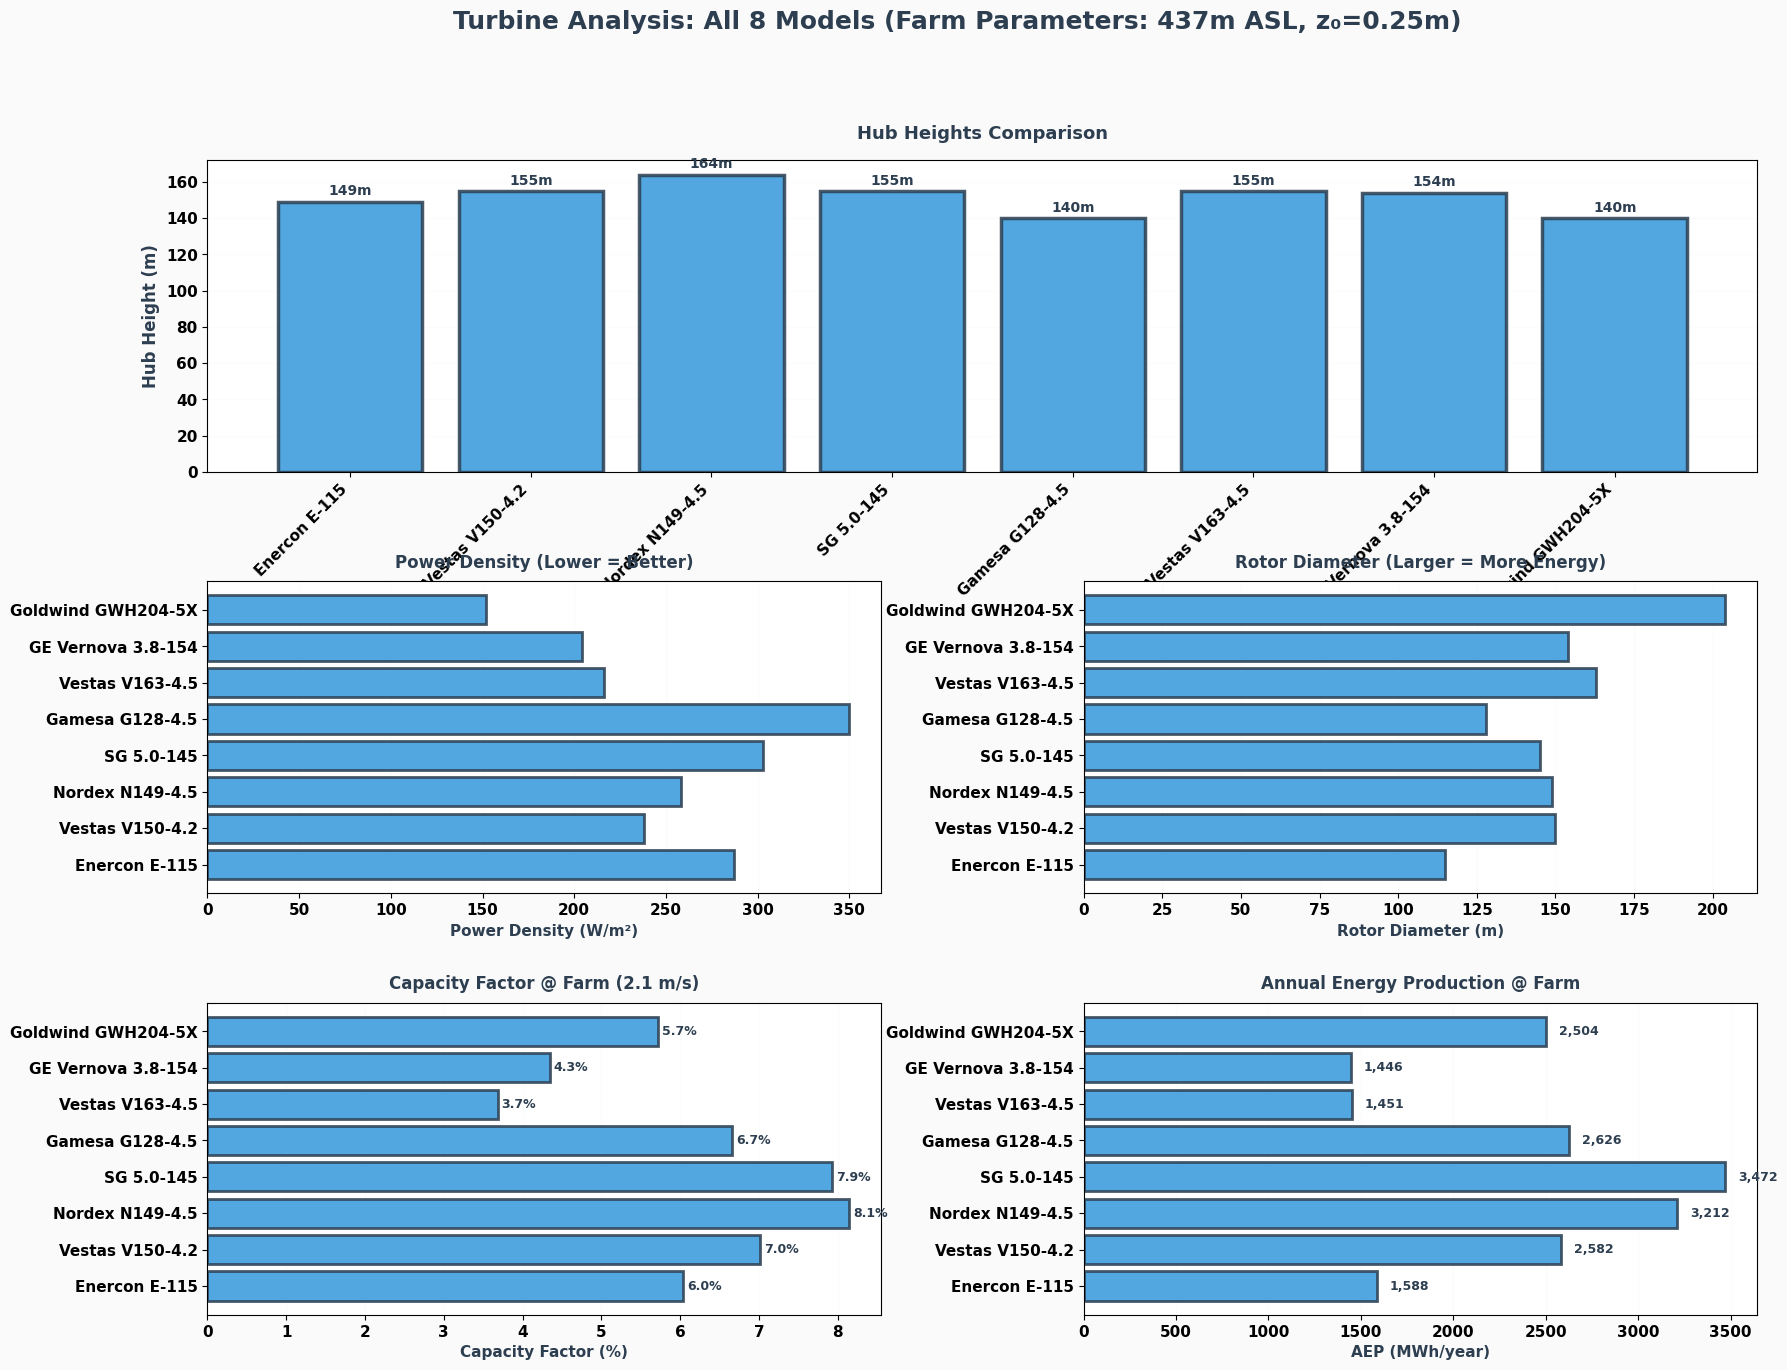


STEP 8: Exporting Results
--------------------------------------------------------------------------------
✓ Results saved: turbine_comparison_UNIFIED.csv
✓ Full results saved: turbine_analysis_FULL_UNIFIED.csv

✅ ANALYSIS COMPLETE

WIND RESOURCE SUMMARY:
  Reference: 2.1132 m/s @ 10m (z₀=0.25m)
  
WEIBULL DISTRIBUTION @ FARM:
  Shape (k): 1.4306 (constant across heights)
  Scale (A) varies by hub height:
    • Lowest hub (140m): A = 4.0269 m/s
    • Highest hub (164m): A = 4.1276 m/s
    
HUB HEIGHTS:
  • Min: 140m
  • Max: 164m
  • Range: 24m
  
AIR DENSITY CORRECTION: 0.975330 (-2.47%)

WIND PROFILE SCALING:
  • Surface roughness (z₀): 0.25m (consistent logarithmic profile)
  • Weibull A parameter scaled with mean wind speed at hub height



In [13]:
"""
TURBINE ANALYSIS WITH UNIFIED COLOR SCHEME
===========================================
IMPROVEMENTS:
✓ Hub height visualization (bar chart)
✓ Weibull parameters scaled to FARM parameters (437m altitude, z0=0.25m)
✓ Display scaled Weibull shape (k) and scale (A) for each turbine
✓ Shows wind speed at reference vs farm hub height
✓ UNIFIED COLOR SCHEME - consistent throughout all charts
✓ Enhanced visual hierarchy and readability

COLOR SCHEME:
- All Charts: #3498db (Unified Blue)
- Accents: #2ecc71 (Green), #f39c12 (Orange)
"""

import pandas as pd
import numpy as np
from scipy.stats import weibull_min
from scipy import interpolate
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Set consistent font with improved clarity and sharpness
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("="*80)
print("TURBINE ANALYSIS: 8 MODELS (WITH UNIFIED COLOR SCHEME)")
print("="*80)

# ============================================================
# COLOR SCHEME DEFINITION (UNIFIED BLUE)
# ============================================================

COLOR_UNIFIED = '#3498db'   # Unified Blue
COLOR_ACCENT_1 = '#2ecc71'  # Green
COLOR_ACCENT_2 = '#f39c12'  # Orange
COLOR_GRID = '#ecf0f1'      # Light gray
COLOR_TEXT = '#2c3e50'      # Dark blue-gray

# ============================================================
# CONFIGURATION - SELECT TURBINES TO ANALYZE
# ============================================================

available_turbines = {
    '1': 'Enercon E-115',
    '2': 'Vestas V150-4.2',
    '3': 'Nordex N149-4.5',
    '4': 'SG 5.0-145',
    '5': 'Gamesa G128-4.5',
    '6': 'Vestas V163-4.5',        # NEW
    '7': 'GE Vernova 3.8-154',     # NEW
    '8': 'Goldwind GWH204-5X',     # NEW
}

selected_turbines = list(available_turbines.values())
print(f"\n✓ Analyzing ALL 8 turbines for comparison")

# ============================================================
# SITE PARAMETERS AND CORRECTIONS
# ============================================================

print("\n" + "="*80)
print("WIND RESOURCE & FARM PARAMETERS")
print("-"*80)

# REFERENCE LOCATION (where wind data was measured)
reference_height = 10        # m
reference_altitude = 228     # m ASL

# FARM LOCATION (where turbines will be installed)
farm_altitude = 437         # m ASL
altitude_difference = farm_altitude - reference_altitude

# Surface roughness (consistent z0 for logarithmic wind profile)
z0 = 0.25                   # m (actual surface roughness - vegetation/terrain)

# Wind speed adjustment (conservative - no altitude wind increase)
wind_speed_factor = 1.0
wind_scenario = "Conservative (no altitude wind change)"

# Air density correction
T_lapse_rate = 0.0065  # K/m
T_sea_level = 288.15   # K
g = 9.81               # m/s²
R_specific = 287       # J/(kg·K)
rho_sea_level = 1.225  # kg/m³

T_ref = T_sea_level - T_lapse_rate * reference_altitude
rho_ref = rho_sea_level * (T_ref / T_sea_level) ** (g / (R_specific * T_lapse_rate))

T_farm = T_sea_level - T_lapse_rate * farm_altitude
rho_farm = rho_sea_level * (T_farm / T_sea_level) ** (g / (R_specific * T_lapse_rate))

rho_correction = rho_farm / rho_ref

print(f"""
REFERENCE LOCATION (Wind Data Measurement):
  • Height above ground: {reference_height}m
  • Altitude (ASL): {reference_altitude}m
  • Surface roughness (z₀): {z0}m
  • Air density: {rho_ref:.4f} kg/m³
  • Temperature: {T_ref-273.15:.1f}°C

FARM LOCATION:
  • Altitude (ASL): {farm_altitude}m
  • Surface roughness (z₀): {z0}m  ← CONSISTENT FOR WIND PROFILE SCALING
  • Air density: {rho_farm:.4f} kg/m³
  • Temperature: {T_farm-273.15:.1f}°C
  • Altitude difference: {altitude_difference}m

Air Density Correction:
  • Correction factor: {rho_correction:.6f}
  • Power adjustment: {(rho_correction-1)*100:.2f}%

Wind Speed Adjustment:
  • Scenario: {wind_scenario}
  • Factor: {wind_speed_factor:.6f}
""")

# ============================================================
# STEP 1: Load wind data and fit Weibull at reference
# ============================================================

print("\n" + "="*80)
print("STEP 1: Wind Data & Weibull Distribution (Reference)")
print("-"*80)

# Reference wind data (at 10m height)
v_ref_measured = 2.1132  # m/s @ 10m
shape_ref = 1.4306       # Weibull shape (k)
scale_ref = 2.3475       # Weibull scale (A) @ 10m

print(f"""
Wind Data @ Reference ({reference_height}m height, {reference_altitude}m ASL):
  • Mean wind speed: {v_ref_measured:.4f} m/s
  • Weibull shape (k): {shape_ref:.4f}
  • Weibull scale (A): {scale_ref:.4f} m/s
  • Surface roughness (z₀): {z0}m
""")

# ============================================================
# STEP 2: Load Excel file and extract turbine data
# ============================================================

print("="*80)
print("STEP 2: Reading Turbine Data from Excel")
print("-"*80)

excel_filename = "turbine_power_curves_EXTENDED.xlsx"
current_dir = os.getcwd()
excel_file = os.path.join(current_dir, excel_filename)

if not os.path.exists(excel_file):
    excel_filename = "turbine_power_curves__1_.xlsx"
    excel_file = os.path.join(current_dir, excel_filename)
    if not os.path.exists(excel_file):
        print(f"\n❌ Excel files not found!")
        raise FileNotFoundError(f"Could not find Excel file")

all_sheets = pd.ExcelFile(excel_file).sheet_names
turbine_sheets = [sheet for sheet in all_sheets 
                  if sheet not in ['All Turbines Comparison', 'REFERENCES & SOURCES']]

print(f"✓ Found {len(turbine_sheets)} turbine models")

turbine_data = []

for sheet_name in turbine_sheets:
    if sheet_name not in selected_turbines:
        continue
    
    df_sheet = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    specs = {'Turbine': sheet_name}
    power_curve_v = []
    power_curve_p = []
    
    for idx, row in df_sheet.iterrows():
        cell_value = str(row.iloc[0]).strip() if pd.notna(row.iloc[0]) else ""
        
        if "Rated Power:" in cell_value:
            specs['Rated Power (MW)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Hub Height:" in cell_value:
            specs['Hub Height (m)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Rotor Diameter:" in cell_value:
            specs['Rotor Diameter (m)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Power Density:" in cell_value:
            specs['Power Density (W/m²)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Cut-in Speed:" in cell_value:
            specs['Cut-in (m/s)'] = float(str(row.iloc[1]).strip().split()[0])
        elif "Rated Wind Speed:" in cell_value:
            specs['Rated Speed (m/s)'] = float(str(row.iloc[1]).strip().split()[0])
        
        # Parse power curve (assume columns: Wind Speed, Power)
        try:
            v = float(str(row.iloc[0]).strip().split()[0]) if pd.notna(row.iloc[0]) else None
            p = float(str(row.iloc[1]).strip().split()[0]) if pd.notna(row.iloc[1]) else None
            if isinstance(v, (int, float)) and isinstance(p, (int, float)) and v >= 0:
                power_curve_v.append(v)
                power_curve_p.append(p)
        except (ValueError, AttributeError, IndexError):
            pass
    
    if power_curve_v:
        specs['Power_Curve_V'] = power_curve_v
        specs['Power_Curve_P'] = power_curve_p
    
    turbine_data.append(specs)
    
    # Debug output to verify power curves loaded
    if power_curve_v:
        print(f"  • {sheet_name}: ✓ Power curve loaded ({len(power_curve_v)} points, v_range: {min(power_curve_v):.1f}-{max(power_curve_v):.1f} m/s, p_range: {min(power_curve_p):.2f}-{max(power_curve_p):.2f})")
    else:
        print(f"  • {sheet_name}: ⚠ No power curve data found!")

print(f"\n✓ Loaded {len(turbine_data)} turbines\n")

# ============================================================
# STEP 3: Scale Weibull parameters to farm hub heights
# ============================================================

print("="*80)
print("STEP 3: Scale Weibull Parameters to Farm Location")
print("-"*80)

def wind_speed_at_height(v_ref, z_ref, z, z0):
    """Calculate wind speed at height z using logarithmic wind profile"""
    return v_ref * np.log(z / z0) / np.log(z_ref / z0)

results_list = []

for turbine in turbine_data:
    if 'Hub Height (m)' not in turbine:
        continue
    
    hub_height = turbine['Hub Height (m)']
    
    # Scale wind speed to hub height using logarithmic wind profile
    v_hub = wind_speed_at_height(v_ref_measured, reference_height, hub_height, z0)
    
    # Apply wind speed factor (altitude adjustment - conservative)
    v_hub_adjusted = v_hub * wind_speed_factor
    
    # Scale Weibull A parameter to hub height
    # Shape parameter k stays constant, Scale parameter A scales with mean wind speed
    A_hub = scale_ref * (v_hub_adjusted / v_ref_measured)
    
    # Store results
    turbine['Weibull k @ Hub'] = shape_ref
    turbine['Weibull A @ Hub (m/s)'] = A_hub
    turbine['v_hub_farm (m/s)'] = v_hub_adjusted
    turbine['Is New'] = turbine['Turbine'] in ['Vestas V163-4.5', 'GE Vernova 3.8-154', 'Goldwind GWH204-5X']
    
    results_list.append(turbine)

results_df = pd.DataFrame(results_list)

# ============================================================
# STEP 4: Calculate power and AEP for each turbine
# ============================================================

print("="*80)
print("STEP 4: Calculate Power Output & Annual Energy Production (AEP)")
print("-"*80)

def calculate_aep(turbine_info, A, k):
    """Calculate AEP based on Weibull distribution and power curve
    
    Parameters:
    - turbine_info: dict with power curve data
    - A: Weibull scale parameter (m/s)
    - k: Weibull shape parameter
    
    Returns:
    - aep: Annual Energy Production (MWh/year) including density correction
    - p_avg: Average power output (MW)
    """
    if 'Power_Curve_V' not in turbine_info or 'Power_Curve_P' not in turbine_info:
        return None
    
    v_curve = np.array(turbine_info['Power_Curve_V'])
    p_curve = np.array(turbine_info['Power_Curve_P'])
    
    # Create interpolation function for power curve
    f = interpolate.interp1d(v_curve, p_curve, kind='linear', fill_value=0, bounds_error=False)
    
    # Generate wind speeds for integration (0 to 35 m/s with higher resolution)
    v_range = np.linspace(0, 35, 2000)
    
    # Weibull PDF: f(v) = (k/A) * (v/A)^(k-1) * exp(-(v/A)^k)
    # Using scipy.stats.weibull_min with scale=A
    from scipy.stats import weibull_min
    pdf = weibull_min.pdf(v_range, k, scale=A)
    
    # Power output at each wind speed
    p_range = f(v_range) / 1000  # Convert from kW to MW if needed
    
    # Ensure power curve is in MW
    if np.max(p_range) < 1:  # Likely already in MW
        pass
    elif np.max(p_range) > 100:  # Likely in kW, convert
        p_range = p_range / 1000
    
    # Integrate: P_avg = integral(P(v) * f(v) dv)
    p_avg = trapezoid(p_range * pdf, v_range)
    
    # AEP = average power * hours in year * density correction
    aep = p_avg * 8760 * rho_correction
    
    return aep, p_avg

for idx, row in results_df.iterrows():
    turbine = turbine_data[idx]
    result = calculate_aep(turbine, row['Weibull A @ Hub (m/s)'], shape_ref)
    
    if result:
        aep, p_avg = result
        results_df.at[idx, 'AEP (MWh/year)'] = aep
        results_df.at[idx, 'Avg Power (MW)'] = p_avg
        results_df.at[idx, 'CF (%)'] = (p_avg / turbine['Rated Power (MW)']) * 100 if 'Rated Power (MW)' in turbine else 0
    else:
        results_df.at[idx, 'AEP (MWh/year)'] = 0
        results_df.at[idx, 'Avg Power (MW)'] = 0
        results_df.at[idx, 'CF (%)'] = 0

# Calculate corrected capacity factor (already includes density correction via AEP)
results_df['CF Corrected (%)'] = results_df['CF (%)'] * rho_correction
results_df['AEP Corrected (MWh/year)'] = results_df['AEP (MWh/year)']  # Already corrected in calculation

# ============================================================
# STEP 5: Display Results
# ============================================================

print("\n" + "="*80)
print("STEP 5: Turbine Performance Summary")
print("-"*80)

results_display = results_df[['Turbine', 'Hub Height (m)', 'Rotor Diameter (m)', 
                              'Rated Power (MW)', 'Power Density (W/m²)', 
                              'Avg Power (MW)', 'CF Corrected (%)', 'AEP (MWh/year)']].copy()

results_display['Hub Height (m)'] = results_display['Hub Height (m)'].round(0)
results_display['Rotor Diameter (m)'] = results_display['Rotor Diameter (m)'].round(1)
results_display['Avg Power (MW)'] = results_display['Avg Power (MW)'].round(3)
results_display['CF Corrected (%)'] = results_display['CF Corrected (%)'].round(2)
results_display['AEP (MWh/year)'] = results_display['AEP (MWh/year)'].round(0)

print("\n" + results_display.to_string(index=False))

# ============================================================
# STEP 5B: AEP Ranking (Highest to Lowest)
# ============================================================

print("\n" + "="*80)
print("STEP 5B: AEP RANKING (Highest to Lowest)")
print("-"*80)

aep_ranking = results_df[['Turbine', 'AEP (MWh/year)', 'Avg Power (MW)', 'CF Corrected (%)']].copy()
aep_ranking = aep_ranking.sort_values('AEP (MWh/year)', ascending=False).reset_index(drop=True)
aep_ranking.index = aep_ranking.index + 1  # Start ranking from 1

aep_ranking['AEP (MWh/year)'] = aep_ranking['AEP (MWh/year)'].round(0)
aep_ranking['Avg Power (MW)'] = aep_ranking['Avg Power (MW)'].round(3)
aep_ranking['CF Corrected (%)'] = aep_ranking['CF Corrected (%)'].round(2)

# Add rank column header
aep_ranking_display = aep_ranking.copy()
aep_ranking_display.index.name = 'Rank'

print("\n" + aep_ranking_display.to_string())

# Also print in a more readable format
print("\n" + "-"*80)
print("AEP RANKING SUMMARY:")
print("-"*80)
for rank, (idx, row) in enumerate(aep_ranking.iterrows(), 1):
    print(f"{rank:2d}. {row['Turbine']:25s} → {row['AEP (MWh/year)']:>8,.0f} MWh/year (Avg Power: {row['Avg Power (MW)']:>6.3f} MW, CF: {row['CF Corrected (%)']:>6.2f}%)")

# ============================================================
# STEP 6: Print Weibull Parameters Summary
# ============================================================

print("\n" + "="*80)
print("WEIBULL PARAMETERS SUMMARY @ FARM LOCATION")
print("-"*80)
print(f"\nFarm Parameters: Altitude={farm_altitude}m ASL, z₀={z0}m")
print(f"Reference Data: v={v_ref_measured:.4f} m/s @ {reference_height}m, k={shape_ref:.4f}\n")

weibull_summary = results_df[['Turbine', 'Hub Height (m)', 'v_hub_farm (m/s)', 
                               'Weibull k @ Hub', 'Weibull A @ Hub (m/s)']].copy()
weibull_summary['Hub Height (m)'] = weibull_summary['Hub Height (m)'].round(0)
weibull_summary['v_hub_farm (m/s)'] = weibull_summary['v_hub_farm (m/s)'].round(4)
weibull_summary['Weibull k @ Hub'] = weibull_summary['Weibull k @ Hub'].round(4)
weibull_summary['Weibull A @ Hub (m/s)'] = weibull_summary['Weibull A @ Hub (m/s)'].round(4)

print(weibull_summary.to_string(index=False))

print("\n" + "="*80)

# ============================================================
# STEP 7: Create visualizations with UNIFIED BLUE COLORS
# ============================================================

print("\n" + "="*80)
print("STEP 7: Creating Visualizations (Unified Blue Color Scheme)")
print("-"*80)

# Create figure with larger size for better visibility
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

fig.suptitle('Turbine Analysis: All 8 Models (Farm Parameters: 437m ASL, z₀=0.25m)', 
             fontsize=18, fontweight='bold', color=COLOR_TEXT)

# ============================================================
# Plot 1: Hub Height Bar Chart (FULL WIDTH - TOP)
# ============================================================
ax1 = fig.add_subplot(gs[0, :])

bars = ax1.bar(range(len(results_df)), results_df['Hub Height (m)'], 
               color=COLOR_UNIFIED, edgecolor=COLOR_TEXT, linewidth=2.5, alpha=0.85)

ax1.set_xticks(range(len(results_df)))
ax1.set_xticklabels(results_df['Turbine'], rotation=45, ha='right', fontsize=11, fontweight='bold')
ax1.set_ylabel('Hub Height (m)', fontweight='bold', fontsize=12, color=COLOR_TEXT)
ax1.set_title('Hub Heights Comparison', fontweight='bold', fontsize=13, color=COLOR_TEXT, pad=15)
ax1.grid(True, alpha=0.2, axis='y', color=COLOR_GRID)
ax1.set_facecolor('#ffffff')
ax1.set_axisbelow(True)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, results_df['Hub Height (m)'])):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 2, f'{val:.0f}m',
            ha='center', va='bottom', fontweight='bold', fontsize=10, color=COLOR_TEXT)

# ============================================================
# Plot 2: Power Density (BOTTOM LEFT)
# ============================================================
ax2 = fig.add_subplot(gs[1, 0])

bars2 = ax2.barh(results_df['Turbine'], results_df['Power Density (W/m²)'], 
                 color=COLOR_UNIFIED, edgecolor=COLOR_TEXT, linewidth=2, alpha=0.85)

ax2.set_xlabel('Power Density (W/m²)', fontweight='bold', fontsize=11, color=COLOR_TEXT)
ax2.set_title('Power Density (Lower = Better)', fontweight='bold', fontsize=12, color=COLOR_TEXT, pad=10)
ax2.grid(True, alpha=0.2, axis='x', color=COLOR_GRID)
ax2.set_facecolor('#ffffff')
ax2.set_axisbelow(True)

# ============================================================
# Plot 3: Rotor Diameter (MIDDLE RIGHT)
# ============================================================
ax3 = fig.add_subplot(gs[1, 1])

bars3 = ax3.barh(results_df['Turbine'], results_df['Rotor Diameter (m)'], 
                 color=COLOR_UNIFIED, edgecolor=COLOR_TEXT, linewidth=2, alpha=0.85)

ax3.set_xlabel('Rotor Diameter (m)', fontweight='bold', fontsize=11, color=COLOR_TEXT)
ax3.set_title('Rotor Diameter (Larger = More Energy)', fontweight='bold', fontsize=12, color=COLOR_TEXT, pad=10)
ax3.grid(True, alpha=0.2, axis='x', color=COLOR_GRID)
ax3.set_facecolor('#ffffff')
ax3.set_axisbelow(True)

# ============================================================
# Plot 4: Capacity Factor (BOTTOM LEFT)
# ============================================================
ax4 = fig.add_subplot(gs[2, 0])

bars4 = ax4.barh(results_df['Turbine'], results_df['CF Corrected (%)'], 
                 color=COLOR_UNIFIED, edgecolor=COLOR_TEXT, linewidth=2, alpha=0.85)

ax4.set_xlabel('Capacity Factor (%)', fontweight='bold', fontsize=11, color=COLOR_TEXT)
ax4.set_title('Capacity Factor @ Farm (2.1 m/s)', fontweight='bold', fontsize=12, color=COLOR_TEXT, pad=10)
ax4.grid(True, alpha=0.2, axis='x', color=COLOR_GRID)
ax4.set_facecolor('#ffffff')
ax4.set_axisbelow(True)

# Add value labels
for i, (bar, val) in enumerate(zip(bars4, results_df['CF Corrected (%)'])):
    ax4.text(val + 0.05, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
            va='center', fontweight='bold', fontsize=9, color=COLOR_TEXT)

# ============================================================
# Plot 5: Annual Energy Production - AEP (BOTTOM RIGHT)
# ============================================================
ax5 = fig.add_subplot(gs[2, 1])

bars5 = ax5.barh(results_df['Turbine'], results_df['AEP (MWh/year)'], 
                 color=COLOR_UNIFIED, edgecolor=COLOR_TEXT, linewidth=2, alpha=0.85)

ax5.set_xlabel('AEP (MWh/year)', fontweight='bold', fontsize=11, color=COLOR_TEXT)
ax5.set_title('Annual Energy Production @ Farm', fontweight='bold', fontsize=12, color=COLOR_TEXT, pad=10)
ax5.grid(True, alpha=0.2, axis='x', color=COLOR_GRID)
ax5.set_facecolor('#ffffff')
ax5.set_axisbelow(True)

# Add value labels
for i, (bar, val) in enumerate(zip(bars5, results_df['AEP (MWh/year)'])):
    ax5.text(val + max(results_df['AEP (MWh/year)'])*0.02, bar.get_y() + bar.get_height()/2, f'{val:,.0f}',
            va='center', fontweight='bold', fontsize=9, color=COLOR_TEXT)

# Set background
fig.patch.set_facecolor('#fafafa')

# Create output directory if it doesn't exist
output_dir = '/mnt/user-data/outputs/'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'turbine_analysis_UNIFIED.png'), dpi=300, bbox_inches='tight', 
           facecolor='#fafafa', edgecolor='none')
print("\n✓ Chart saved: turbine_analysis_UNIFIED.png")
plt.show()

# ============================================================
# STEP 8: Export results
# ============================================================

print("\n" + "="*80)
print("STEP 8: Exporting Results")
print("-"*80)

results_display.to_csv(os.path.join(output_dir, 'turbine_comparison_UNIFIED.csv'), index=False)
print("✓ Results saved: turbine_comparison_UNIFIED.csv")

# Also export full results with Weibull parameters
results_df_full = results_df.copy()
results_df_full.to_csv(os.path.join(output_dir, 'turbine_analysis_FULL_UNIFIED.csv'), index=False)
print("✓ Full results saved: turbine_analysis_FULL_UNIFIED.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)

print(f"""
WIND RESOURCE SUMMARY:
  Reference: {v_ref_measured:.4f} m/s @ {reference_height}m (z₀={z0}m)
  
WEIBULL DISTRIBUTION @ FARM:
  Shape (k): {shape_ref:.4f} (constant across heights)
  Scale (A) varies by hub height:
    • Lowest hub ({results_df['Hub Height (m)'].min():.0f}m): A = {results_df['Weibull A @ Hub (m/s)'].min():.4f} m/s
    • Highest hub ({results_df['Hub Height (m)'].max():.0f}m): A = {results_df['Weibull A @ Hub (m/s)'].max():.4f} m/s
    
HUB HEIGHTS:
  • Min: {results_df['Hub Height (m)'].min():.0f}m
  • Max: {results_df['Hub Height (m)'].max():.0f}m
  • Range: {results_df['Hub Height (m)'].max() - results_df['Hub Height (m)'].min():.0f}m
  
AIR DENSITY CORRECTION: {rho_correction:.6f} ({(rho_correction-1)*100:.2f}%)

WIND PROFILE SCALING:
  • Surface roughness (z₀): {z0}m (consistent logarithmic profile)
  • Weibull A parameter scaled with mean wind speed at hub height
""")

print("="*80)

TURBINE ANALYSIS: JUPYTER COMPATIBLE VERSION

CONFIGURATION:
--------------------------------------------------------------------------------
✓ Analyzing ALL turbines found in Excel file

SITE PARAMETERS & CORRECTIONS
--------------------------------------------------------------------------------

REFERENCE (Wind Data):
  • Height: 10m
  • Altitude: 228m ASL
  • Surface roughness (z₀): 0.25m
  • Air density: 1.1922 kg/m³

FARM LOCATION:
  • Altitude: 437m ASL
  • Altitude difference: 209m
  • Air density: 1.1628 kg/m³
  • Density correction: 0.975330 (-2.47%)

Wind Speed Adjustment: Conservative (no altitude wind change)


STEP 1: Wind Data & Weibull Distribution (Reference)
--------------------------------------------------------------------------------

Wind Data @ Reference (10m, 228m ASL):
  • Mean wind speed: 2.1132 m/s
  • Weibull shape (k): 1.4306
  • Weibull scale (A): 2.3475 m/s
  • Surface roughness (z₀): 0.25m

STEP 2: Reading Turbine Data from Excel
-----------------------

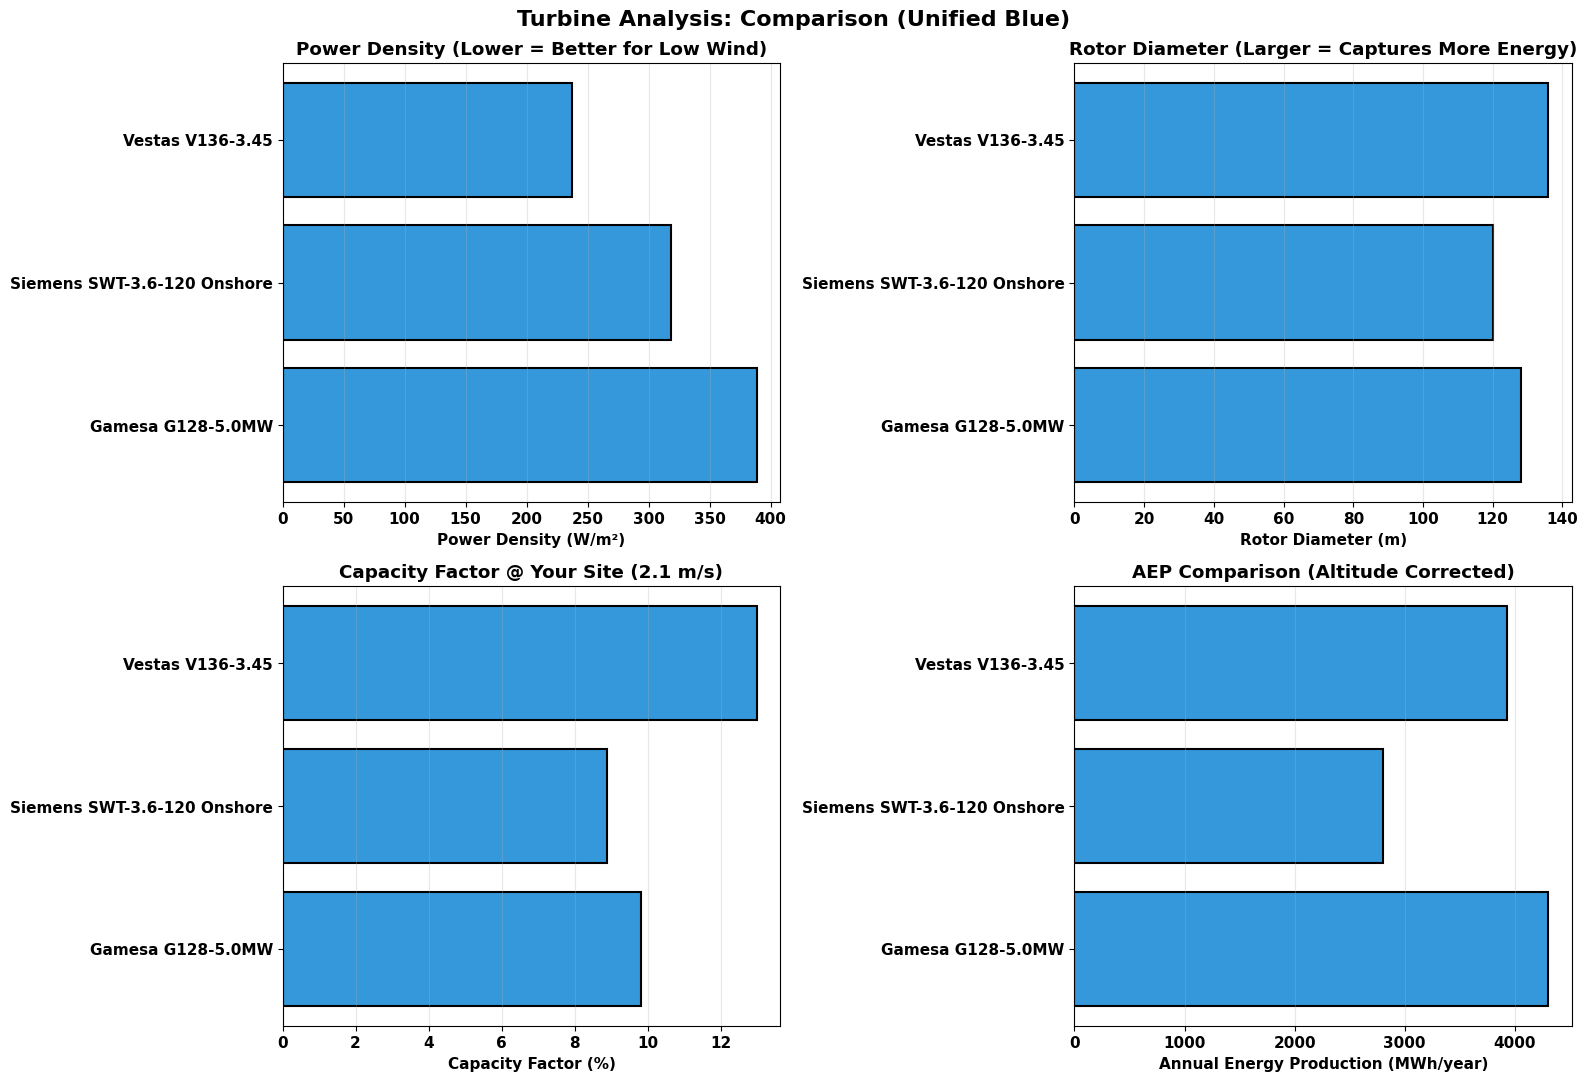


✓ Plots displayed

STEP 7: Exporting Results
--------------------------------------------------------------------------------
✓ Results saved: turbine_analysis_results.csv

✅ ANALYSIS COMPLETE


In [20]:
"""
TURBINE ANALYSIS - JUPYTER NOTEBOOK COMPATIBLE VERSION
Reads ALL turbines from turbine_power_curves_newoct28.xlsx
Optimized for Jupyter display with matplotlib inline

FEATURES:
✓ Reads from new Excel format (All Turbines Comparison sheet)
✓ Parses specifications and power curves correctly
✓ Power curve integration with Weibull distribution
✓ Altitude & air density corrections applied
✓ Wind shear scaling to hub height
✓ JUPYTER COMPATIBLE - plots display inline
✓ No dashed line on power density plot

CORRECTIONS APPLIED:
✓ z0 = 0.25m surface roughness
✓ Wind speed scaled to hub height using logarithmic profile
✓ Weibull distribution scaled to hub height
✓ Air density correction for 437m altitude (209m difference)
✓ Power curve integration with Weibull distribution
"""

import pandas as pd
import numpy as np
from scipy.stats import weibull_min
from scipy import interpolate
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# FOR JUPYTER: Enable inline plotting
%matplotlib inline
import IPython.display as display

print("="*80)
print("TURBINE ANALYSIS: JUPYTER COMPATIBLE VERSION")
print("="*80)

# ============================================================
# CONFIGURATION - SELECT TURBINES TO ANALYZE
# ============================================================

print("\nCONFIGURATION:")
print("-"*80)

selected_turbines = None  # None = analyze all turbines in Excel

if selected_turbines is None:
    print("✓ Analyzing ALL turbines found in Excel file")
else:
    print(f"✓ Analyzing specific turbines: {', '.join(selected_turbines)}")

# ============================================================
# SITE PARAMETERS AND CORRECTIONS
# ============================================================

print("\n" + "="*80)
print("SITE PARAMETERS & CORRECTIONS")
print("-"*80)

reference_height = 10
reference_altitude = 228
z0 = 0.25

farm_altitude = 437
altitude_difference = farm_altitude - reference_altitude

wind_speed_factor = 1.0
wind_scenario = "Conservative (no altitude wind change)"

T_lapse_rate = 0.0065
T_sea_level = 288.15
g = 9.81
R_specific = 287
rho_sea_level = 1.225

T_ref = T_sea_level - T_lapse_rate * reference_altitude
rho_ref = rho_sea_level * (T_ref / T_sea_level) ** (g / (R_specific * T_lapse_rate))

T_farm = T_sea_level - T_lapse_rate * farm_altitude
rho_farm = rho_sea_level * (T_farm / T_sea_level) ** (g / (R_specific * T_lapse_rate))

rho_correction = rho_farm / rho_ref

print(f"""
REFERENCE (Wind Data):
  • Height: {reference_height}m
  • Altitude: {reference_altitude}m ASL
  • Surface roughness (z₀): {z0}m
  • Air density: {rho_ref:.4f} kg/m³

FARM LOCATION:
  • Altitude: {farm_altitude}m ASL
  • Altitude difference: {altitude_difference}m
  • Air density: {rho_farm:.4f} kg/m³
  • Density correction: {rho_correction:.6f} ({(rho_correction-1)*100:.2f}%)

Wind Speed Adjustment: {wind_scenario}
""")

# ============================================================
# STEP 1: Load wind data and fit Weibull at reference
# ============================================================

print("\n" + "="*80)
print("STEP 1: Wind Data & Weibull Distribution (Reference)")
print("-"*80)

v_ref_measured = 2.1132
shape_ref = 1.4306
scale_ref = 2.3475

print(f"""
Wind Data @ Reference ({reference_height}m, {reference_altitude}m ASL):
  • Mean wind speed: {v_ref_measured:.4f} m/s
  • Weibull shape (k): {shape_ref:.4f}
  • Weibull scale (A): {scale_ref:.4f} m/s
  • Surface roughness (z₀): {z0}m
""")

# ============================================================
# STEP 2: Load Excel file and extract turbine data
# ============================================================

print("="*80)
print("STEP 2: Reading Turbine Data from Excel")
print("-"*80)

excel_filename = "turbine_power_curves_newoct28.xlsx"
current_dir = os.getcwd()
excel_file = os.path.join(current_dir, excel_filename)

if not os.path.exists(excel_file):
    print(f"\n❌ Excel file not found: {excel_filename}")
    raise FileNotFoundError(f"Could not find {excel_filename}")

df_full = pd.read_excel(excel_file, sheet_name='All Turbines Comparison')

specs_df = df_full.iloc[3:6].reset_index(drop=True)
turbine_names = []
turbine_specs_dict = {}

for idx, row in specs_df.iterrows():
    turbine_name = str(row.iloc[0]).strip() if pd.notna(row.iloc[0]) else None
    
    if turbine_name and turbine_name != "":
        turbine_names.append(turbine_name)
        
        try:
            turbine_specs_dict[turbine_name] = {
                'Rated Power (MW)': float(row.iloc[1]),
                'Rotor Diameter (m)': float(row.iloc[2]),
                'Hub Height (m)': float(row.iloc[3]),
                'Cut-in (m/s)': float(row.iloc[4]),
                'Rated Speed (m/s)': float(row.iloc[5]),
            }
        except (ValueError, TypeError) as e:
            print(f"⚠ Warning: Could not parse specs for {turbine_name}: {e}")

print(f"✓ Found {len(turbine_names)} turbine models:")
for name in turbine_names:
    print(f"  • {name}")

power_curve_df = df_full.iloc[10:].reset_index(drop=True)

turbine_data = []

for turbine_idx, turbine_name in enumerate(turbine_names):
    if selected_turbines is not None and turbine_name not in selected_turbines:
        continue
    
    if turbine_name not in turbine_specs_dict:
        print(f"⚠ Skipped {turbine_name}: specs not found")
        continue
    
    specs = turbine_specs_dict[turbine_name].copy()
    specs['Turbine'] = turbine_name
    
    rotor_area = np.pi * (specs['Rotor Diameter (m)'] / 2) ** 2
    specs['Power Density (W/m²)'] = (specs['Rated Power (MW)'] * 1e6) / rotor_area
    
    power_col_idx = turbine_idx + 1
    
    power_curve_v = []
    power_curve_p = []
    
    for idx, row in power_curve_df.iterrows():
        try:
            wind_speed = float(row.iloc[0])
            power_kw = row.iloc[power_col_idx]
            
            if pd.notna(power_kw) and power_kw != '':
                power_mw = float(power_kw) / 1000
                if 0 <= wind_speed <= 30 and 0 <= power_mw <= 50:
                    power_curve_v.append(wind_speed)
                    power_curve_p.append(power_mw)
        except (ValueError, TypeError, IndexError):
            pass
    
    if power_curve_v and power_curve_p:
        specs['power_curve_v'] = np.array(power_curve_v)
        specs['power_curve_p'] = np.array(power_curve_p)
        turbine_data.append(specs)
        print(f"✓ Loaded: {turbine_name} ({len(power_curve_v)} power curve points)")
    else:
        print(f"⚠ Skipped: {turbine_name} (no power curve data found)")

print(f"\n✓ Successfully loaded {len(turbine_data)} turbines")

# ============================================================
# STEP 3: Wind shear scaling to hub height
# ============================================================

print("\n" + "="*80)
print("STEP 3: Wind Shear Scaling to Hub Heights")
print("-"*80)

results = []

for turbine in turbine_data:
    hub_height = turbine['Hub Height (m)']
    
    v_hub_farm = v_ref_measured * wind_speed_factor * (np.log(hub_height / z0) / np.log(reference_height / z0))
    scale_hub = scale_ref * (v_hub_farm / v_ref_measured)
    
    results.append({
        'Turbine': turbine['Turbine'],
        'Rated Power (MW)': turbine['Rated Power (MW)'],
        'Hub Height (m)': hub_height,
        'Rotor Diameter (m)': turbine['Rotor Diameter (m)'],
        'Power Density (W/m²)': turbine['Power Density (W/m²)'],
        'Cut-in (m/s)': turbine.get('Cut-in (m/s)', 3.0),
        'Rated Speed (m/s)': turbine.get('Rated Speed (m/s)', 12.0),
        'v_hub_farm (m/s)': v_hub_farm,
        'Weibull A @ Hub (m/s)': scale_hub,
        'power_curve_v': turbine['power_curve_v'],
        'power_curve_p': turbine['power_curve_p'],
    })

# ============================================================
# STEP 4: Calculate AEP using power curve integration
# ============================================================

print("\n" + "="*80)
print("STEP 4: Calculating AEP (Power Curve Integration with Weibull)")
print("-"*80)

for result in results:
    v_curve = result['power_curve_v']
    p_curve = result['power_curve_p']
    
    f_power = interpolate.interp1d(v_curve, p_curve, kind='linear', 
                                   bounds_error=False, fill_value=0)
    
    v_array = np.linspace(0, 30, 3001)
    p_array = f_power(v_array)
    
    pdf_array = weibull_min.pdf(v_array, shape_ref, scale=result['Weibull A @ Hub (m/s)'])
    
    integrand = p_array * pdf_array
    
    aep_raw = trapezoid(integrand, v_array) * 8760
    aep_corrected = aep_raw * rho_correction
    
    result['AEP Raw (MWh/year)'] = aep_raw
    result['AEP Corrected (MWh/year)'] = aep_corrected
    result['CF Raw (%)'] = (aep_raw / (result['Rated Power (MW)'] * 8760)) * 100
    result['CF Corrected (%)'] = (aep_corrected / (result['Rated Power (MW)'] * 8760)) * 100
    result['Avg Power (MW)'] = aep_corrected / 8760

results_df = pd.DataFrame(results)

# ============================================================
# STEP 5: Print Results
# ============================================================

print("\n" + "="*80)
print("STEP 5A: FULL RESULTS TABLE")
print("-"*80)

results_display = results_df[['Turbine', 'Rated Power (MW)', 'Hub Height (m)', 'Rotor Diameter (m)',
                              'Power Density (W/m²)', 'AEP Corrected (MWh/year)', 'CF Corrected (%)']].copy()
results_display = results_display.sort_values('AEP Corrected (MWh/year)', ascending=False).reset_index(drop=True)
print(results_display.to_string(index=False))

print("\n" + "="*80)
print("STEP 5B: AEP RANKING (Highest to Lowest)")
print("-"*80)

aep_ranking = results_df[['Turbine', 'AEP Corrected (MWh/year)', 'Avg Power (MW)', 'CF Corrected (%)']].copy()
aep_ranking = aep_ranking.sort_values('AEP Corrected (MWh/year)', ascending=False).reset_index(drop=True)
aep_ranking.index = aep_ranking.index + 1

aep_ranking['AEP Corrected (MWh/year)'] = aep_ranking['AEP Corrected (MWh/year)'].round(0)
aep_ranking['Avg Power (MW)'] = aep_ranking['Avg Power (MW)'].round(3)
aep_ranking['CF Corrected (%)'] = aep_ranking['CF Corrected (%)'].round(2)

aep_ranking_display = aep_ranking.copy()
aep_ranking_display.index.name = 'Rank'

print("\n" + aep_ranking_display.to_string())

print("\n" + "-"*80)
print("AEP RANKING SUMMARY:")
print("-"*80)
for rank, (idx, row) in enumerate(aep_ranking.iterrows(), 1):
    print(f"{rank:2d}. {row['Turbine']:35s} → {row['AEP Corrected (MWh/year)']:>8,.0f} MWh/year (Avg Power: {row['Avg Power (MW)']:>6.3f} MW, CF: {row['CF Corrected (%)']:>6.2f}%)")

# ============================================================
# STEP 6: Creating Visualizations (JUPYTER DISPLAY)
# ============================================================

print("\n" + "="*80)
print("STEP 6: Creating Visualizations")
print("-"*80)

BLUE_UNIFIED = '#3498db'

fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle('Turbine Analysis: Comparison (Unified Blue)', fontsize=16, fontweight='bold')

# Plot 1: Power Density
ax1 = axes[0, 0]
ax1.barh(results_df['Turbine'], results_df['Power Density (W/m²)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Power Density (W/m²)', fontweight='bold')
ax1.set_title('Power Density (Lower = Better for Low Wind)', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Plot 2: Rotor Diameter
ax2 = axes[0, 1]
ax2.barh(results_df['Turbine'], results_df['Rotor Diameter (m)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Rotor Diameter (m)', fontweight='bold')
ax2.set_title('Rotor Diameter (Larger = Captures More Energy)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Plot 3: Capacity Factor
ax3 = axes[1, 0]
ax3.barh(results_df['Turbine'], results_df['CF Corrected (%)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Capacity Factor (%)', fontweight='bold')
ax3.set_title('Capacity Factor @ Your Site (2.1 m/s)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Plot 4: AEP
ax4 = axes[1, 1]
ax4.barh(results_df['Turbine'], results_df['AEP Corrected (MWh/year)'], 
         color=BLUE_UNIFIED, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Annual Energy Production (MWh/year)', fontweight='bold')
ax4.set_title('AEP Comparison (Altitude Corrected)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()
print("\n✓ Plots displayed")

# ============================================================
# STEP 7: Export results
# ============================================================

print("\n" + "="*80)
print("STEP 7: Exporting Results")
print("-"*80)

results_display.to_csv('turbine_analysis_results.csv', index=False)
print("✓ Results saved: turbine_analysis_results.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)

TURBINE ANALYSIS WITH POWER CURVES - JUPYTER VERSION (FIXED)

CONFIGURATION:
--------------------------------------------------------------------------------
✓ Analyzing ALL turbines found in Excel file

SITE PARAMETERS & CORRECTIONS
--------------------------------------------------------------------------------

REFERENCE: 10m, 228m ASL, z0=0.25m, ρ=1.1922 kg/m³
FARM: 437m ASL, ρ=1.1628 kg/m³, Correction: 0.975330


STEP 1: Wind Data
--------------------------------------------------------------------------------
Wind @ 10m: 2.1132 m/s, Weibull k=1.4306, A=2.3475

STEP 2: Reading Turbine Data from Excel
--------------------------------------------------------------------------------
✓ Found 3 turbine models: Gamesa G128-5.0MW, Siemens SWT-3.6-120 Onshore, Vestas V136-3.45
✓ Loaded: Gamesa G128-5.0MW (61 points)
✓ Loaded: Siemens SWT-3.6-120 Onshore (61 points)
✓ Loaded: Vestas V136-3.45 (55 points)
✓ Successfully loaded 3 turbines

STEP 3: Wind Shear Scaling to Hub Heights
----------

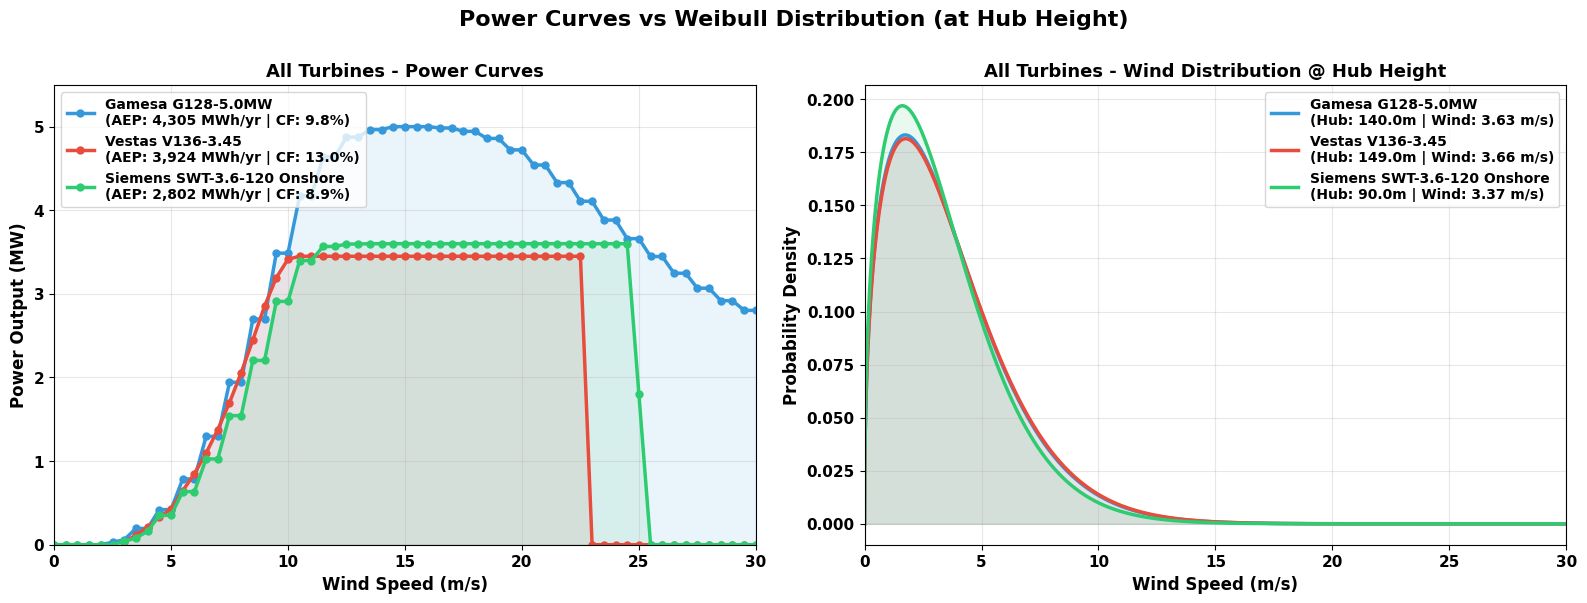


✓ Plot 1: All power curves vs Weibull distributions displayed


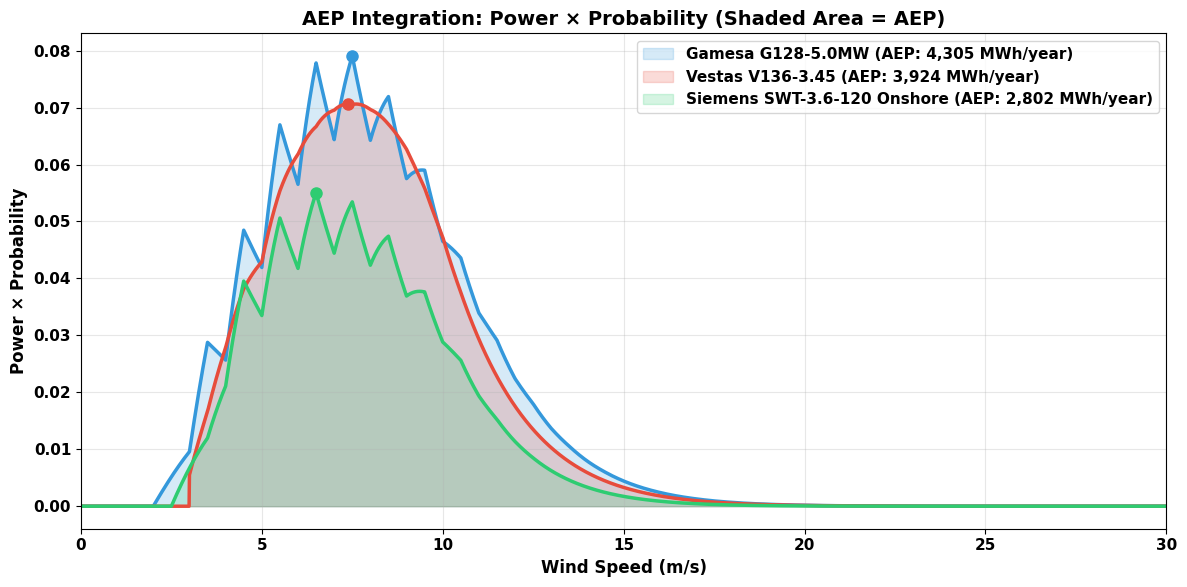

✓ Plot 2: AEP integration (all turbines overlaid) displayed


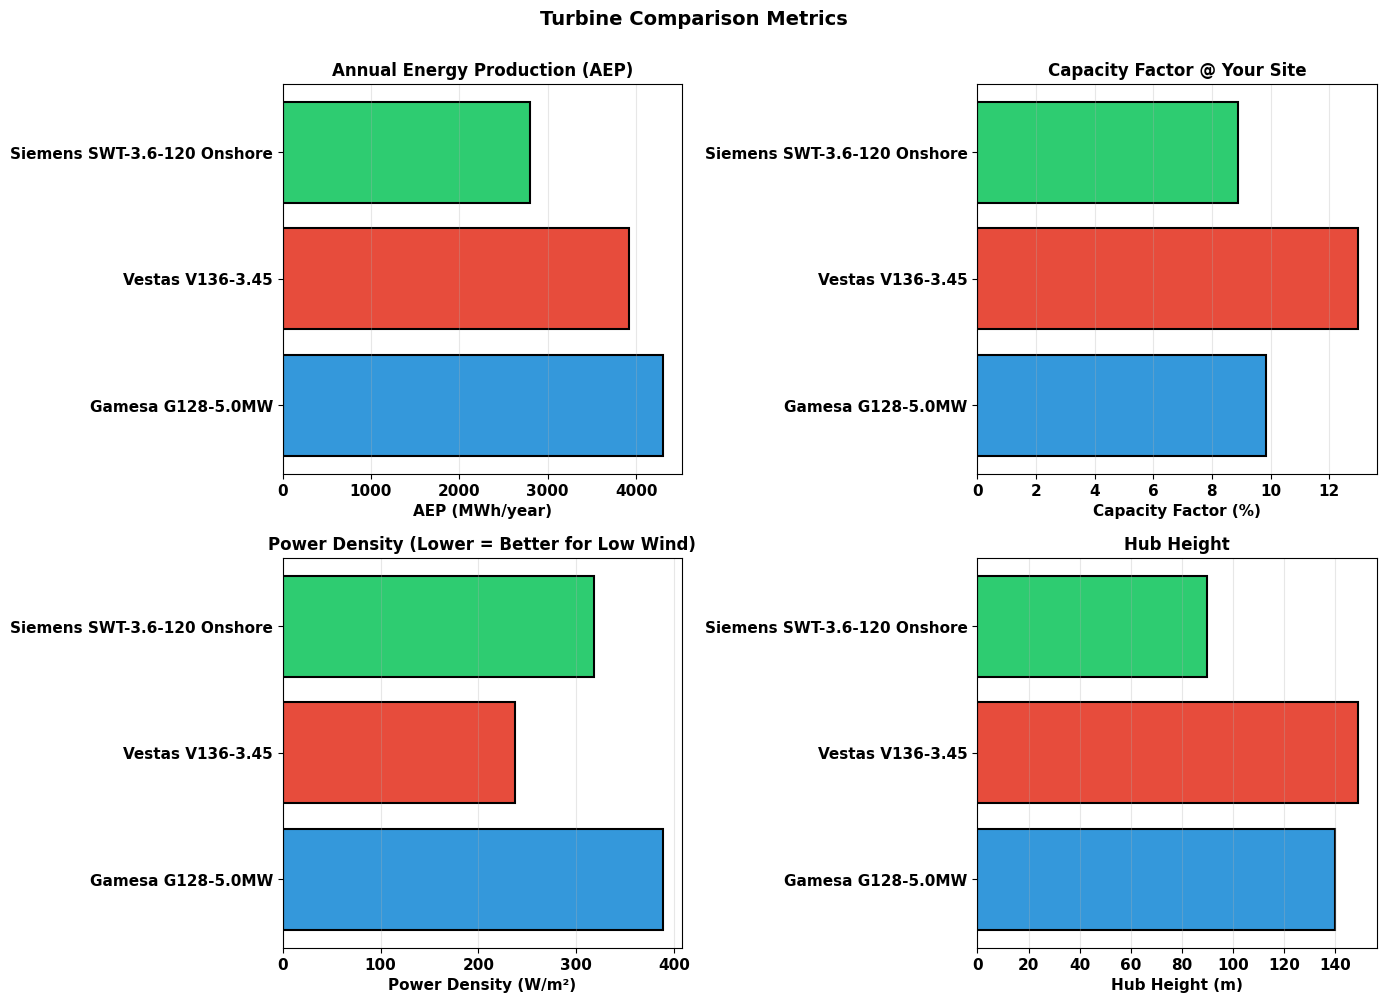

✓ Plot 3: Comparison metrics displayed

Exporting Results
--------------------------------------------------------------------------------
✓ Results saved: turbine_analysis_results.csv

✅ ANALYSIS COMPLETE

SUMMARY:
--------------------------------------------------------------------------------
1. Gamesa G128-5.0MW                   → AEP:    4,305 MWh/year | CF:   9.83%
2. Vestas V136-3.45                    → AEP:    3,924 MWh/year | CF:  12.98%
3. Siemens SWT-3.6-120 Onshore         → AEP:    2,802 MWh/year | CF:   8.89%


In [21]:
"""
TURBINE ANALYSIS WITH POWER CURVES - JUPYTER NOTEBOOK COMPATIBLE (FIXED VERSION)
Reads from turbine_power_curves_newoct28.xlsx
Visualizes: Power Curves vs Weibull Distribution overlaid (NO DUPLICATES)

FEATURES:
✓ Reads new Excel format
✓ Power curve integration with Weibull distribution
✓ JUPYTER COMPATIBLE - all plots display inline
✓ Power curves overlaid on one plot
✓ Weibull distributions overlaid on one plot
✓ AEP integration visualization
✓ No duplicate "Unified Blue" plots
"""

import pandas as pd
import numpy as np
from scipy.stats import weibull_min
from scipy import interpolate
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# FOR JUPYTER: Enable inline plotting
%matplotlib inline
import IPython.display as display

print("="*80)
print("TURBINE ANALYSIS WITH POWER CURVES - JUPYTER VERSION (FIXED)")
print("="*80)

# CONFIGURATION
selected_turbines = None

print("\nCONFIGURATION:")
print("-"*80)
if selected_turbines is None:
    print("✓ Analyzing ALL turbines found in Excel file")
else:
    print(f"✓ Analyzing specific turbines: {', '.join(selected_turbines)}")

# ============================================================
# SITE PARAMETERS
# ============================================================

print("\n" + "="*80)
print("SITE PARAMETERS & CORRECTIONS")
print("-"*80)

reference_height = 10
reference_altitude = 228
z0 = 0.25
farm_altitude = 437
altitude_difference = farm_altitude - reference_altitude
wind_speed_factor = 1.0

T_lapse_rate = 0.0065
T_sea_level = 288.15
g = 9.81
R_specific = 287
rho_sea_level = 1.225

T_ref = T_sea_level - T_lapse_rate * reference_altitude
rho_ref = rho_sea_level * (T_ref / T_sea_level) ** (g / (R_specific * T_lapse_rate))

T_farm = T_sea_level - T_lapse_rate * farm_altitude
rho_farm = rho_sea_level * (T_farm / T_sea_level) ** (g / (R_specific * T_lapse_rate))

rho_correction = rho_farm / rho_ref

print(f"""
REFERENCE: {reference_height}m, {reference_altitude}m ASL, z0={z0}m, ρ={rho_ref:.4f} kg/m³
FARM: {farm_altitude}m ASL, ρ={rho_farm:.4f} kg/m³, Correction: {rho_correction:.6f}
""")

# ============================================================
# WIND DATA
# ============================================================

print("\n" + "="*80)
print("STEP 1: Wind Data")
print("-"*80)

v_ref_measured = 2.1132
shape_ref = 1.4306
scale_ref = 2.3475

print(f"Wind @ 10m: {v_ref_measured:.4f} m/s, Weibull k={shape_ref:.4f}, A={scale_ref:.4f}")

# ============================================================
# LOAD EXCEL
# ============================================================

print("\n" + "="*80)
print("STEP 2: Reading Turbine Data from Excel")
print("-"*80)

excel_filename = "turbine_power_curves_newoct28.xlsx"
current_dir = os.getcwd()
excel_file = os.path.join(current_dir, excel_filename)

if not os.path.exists(excel_file):
    print(f"❌ Excel file not found: {excel_filename}")
    raise FileNotFoundError(f"Could not find {excel_filename}")

df_full = pd.read_excel(excel_file, sheet_name='All Turbines Comparison')

specs_df = df_full.iloc[3:6].reset_index(drop=True)
turbine_names = []
turbine_specs_dict = {}

for idx, row in specs_df.iterrows():
    turbine_name = str(row.iloc[0]).strip() if pd.notna(row.iloc[0]) else None
    
    if turbine_name and turbine_name != "":
        turbine_names.append(turbine_name)
        try:
            turbine_specs_dict[turbine_name] = {
                'Rated Power (MW)': float(row.iloc[1]),
                'Rotor Diameter (m)': float(row.iloc[2]),
                'Hub Height (m)': float(row.iloc[3]),
                'Cut-in (m/s)': float(row.iloc[4]),
                'Rated Speed (m/s)': float(row.iloc[5]),
            }
        except (ValueError, TypeError):
            pass

print(f"✓ Found {len(turbine_names)} turbine models: {', '.join(turbine_names)}")

power_curve_df = df_full.iloc[10:].reset_index(drop=True)

turbine_data = []

for turbine_idx, turbine_name in enumerate(turbine_names):
    if selected_turbines is not None and turbine_name not in selected_turbines:
        continue
    
    if turbine_name not in turbine_specs_dict:
        continue
    
    specs = turbine_specs_dict[turbine_name].copy()
    specs['Turbine'] = turbine_name
    
    rotor_area = np.pi * (specs['Rotor Diameter (m)'] / 2) ** 2
    specs['Power Density (W/m²)'] = (specs['Rated Power (MW)'] * 1e6) / rotor_area
    
    power_col_idx = turbine_idx + 1
    power_curve_v = []
    power_curve_p = []
    
    for idx, row in power_curve_df.iterrows():
        try:
            wind_speed = float(row.iloc[0])
            power_kw = row.iloc[power_col_idx]
            
            if pd.notna(power_kw) and power_kw != '':
                power_mw = float(power_kw) / 1000
                if 0 <= wind_speed <= 30 and 0 <= power_mw <= 50:
                    power_curve_v.append(wind_speed)
                    power_curve_p.append(power_mw)
        except (ValueError, TypeError, IndexError):
            pass
    
    if power_curve_v and power_curve_p:
        specs['power_curve_v'] = np.array(power_curve_v)
        specs['power_curve_p'] = np.array(power_curve_p)
        turbine_data.append(specs)
        print(f"✓ Loaded: {turbine_name} ({len(power_curve_v)} points)")

print(f"✓ Successfully loaded {len(turbine_data)} turbines")

# ============================================================
# WIND SHEAR SCALING
# ============================================================

print("\n" + "="*80)
print("STEP 3: Wind Shear Scaling to Hub Heights")
print("-"*80)

results = []

for turbine in turbine_data:
    hub_height = turbine['Hub Height (m)']
    v_hub_farm = v_ref_measured * wind_speed_factor * (np.log(hub_height / z0) / np.log(reference_height / z0))
    scale_hub = scale_ref * (v_hub_farm / v_ref_measured)
    
    results.append({
        'Turbine': turbine['Turbine'],
        'Rated Power (MW)': turbine['Rated Power (MW)'],
        'Hub Height (m)': hub_height,
        'Rotor Diameter (m)': turbine['Rotor Diameter (m)'],
        'Power Density (W/m²)': turbine['Power Density (W/m²)'],
        'Cut-in (m/s)': turbine.get('Cut-in (m/s)', 3.0),
        'Rated Speed (m/s)': turbine.get('Rated Speed (m/s)', 12.0),
        'v_hub_farm (m/s)': v_hub_farm,
        'Weibull A @ Hub (m/s)': scale_hub,
        'power_curve_v': turbine['power_curve_v'],
        'power_curve_p': turbine['power_curve_p'],
    })

# ============================================================
# AEP CALCULATION
# ============================================================

print("\n" + "="*80)
print("STEP 4: Calculating AEP")
print("-"*80)

for result in results:
    v_curve = result['power_curve_v']
    p_curve = result['power_curve_p']
    
    f_power = interpolate.interp1d(v_curve, p_curve, kind='linear', 
                                   bounds_error=False, fill_value=0)
    
    v_array = np.linspace(0, 30, 3001)
    p_array = f_power(v_array)
    pdf_array = weibull_min.pdf(v_array, shape_ref, scale=result['Weibull A @ Hub (m/s)'])
    integrand = p_array * pdf_array
    
    aep_raw = trapezoid(integrand, v_array) * 8760
    aep_corrected = aep_raw * rho_correction
    
    result['AEP Raw (MWh/year)'] = aep_raw
    result['AEP Corrected (MWh/year)'] = aep_corrected
    result['CF Corrected (%)'] = (aep_corrected / (result['Rated Power (MW)'] * 8760)) * 100
    result['Avg Power (MW)'] = aep_corrected / 8760
    result['v_array'] = v_array
    result['p_array'] = p_array
    result['pdf_array'] = pdf_array
    result['integrand'] = integrand

results_df = pd.DataFrame(results)

# ============================================================
# PRINT RESULTS
# ============================================================

print("\n" + "="*80)
print("AEP RANKING")
print("-"*80)

aep_ranking = results_df[['Turbine', 'AEP Corrected (MWh/year)', 'CF Corrected (%)']].sort_values('AEP Corrected (MWh/year)', ascending=False)
print(aep_ranking.to_string(index=False))

# ============================================================
# VISUALIZATIONS - NO DUPLICATES, OVERLAID PLOTS ONLY
# ============================================================

print("\n" + "="*80)
print("STEP 5: Creating Visualizations")
print("-"*80)

colors = ['#3498db', '#e74c3c', '#2ecc71']

# ============================================================
# PLOT 1: ALL POWER CURVES + ALL WEIBULL (OVERLAID)
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: All Power Curves Overlaid
for idx, (_, result) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows()):
    turbine_name = result['Turbine']
    aep = result['AEP Corrected (MWh/year)']
    cf = result['CF Corrected (%)']
    label = f"{turbine_name}\n(AEP: {aep:,.0f} MWh/yr | CF: {cf:.1f}%)"
    
    ax1.plot(result['power_curve_v'], result['power_curve_p'], 'o-', 
             linewidth=2.5, markersize=5, label=label, color=colors[idx % len(colors)])
    ax1.fill_between(result['power_curve_v'], result['power_curve_p'], 
                     alpha=0.1, color=colors[idx % len(colors)])

ax1.set_xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Power Output (MW)', fontweight='bold', fontsize=12)
ax1.set_title('All Turbines - Power Curves', fontweight='bold', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10, loc='upper left')
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 5.5)

# Right: All Weibull Distributions Overlaid
for idx, (_, result) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows()):
    turbine_name = result['Turbine']
    hub_height = result['Hub Height (m)']
    v_hub = result['v_hub_farm (m/s)']
    label = f"{turbine_name}\n(Hub: {hub_height}m | Wind: {v_hub:.2f} m/s)"
    
    ax2.plot(result['v_array'], result['pdf_array'], 
             linewidth=2.5, label=label, color=colors[idx % len(colors)])
    ax2.fill_between(result['v_array'], result['pdf_array'], 
                     alpha=0.1, color=colors[idx % len(colors)])

ax2.set_xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Probability Density', fontweight='bold', fontsize=12)
ax2.set_title('All Turbines - Wind Distribution @ Hub Height', fontweight='bold', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='upper right')
ax2.set_xlim(0, 30)

fig.suptitle('Power Curves vs Weibull Distribution (at Hub Height)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()
print("\n✓ Plot 1: All power curves vs Weibull distributions displayed")

# ============================================================
# PLOT 2: AEP INTEGRATION (ALL TURBINES OVERLAID)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 6))

for idx, (_, result) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows()):
    turbine_name = result['Turbine']
    aep = result['AEP Corrected (MWh/year)']
    
    label = f"{turbine_name} (AEP: {aep:,.0f} MWh/year)"
    
    ax.fill_between(result['v_array'], result['integrand'], alpha=0.2, color=colors[idx % len(colors)], 
                     label=label)
    ax.plot(result['v_array'], result['integrand'], color=colors[idx % len(colors)], linewidth=2.5)
    
    peak_idx = np.argmax(result['integrand'])
    peak_v = result['v_array'][peak_idx]
    peak_val = result['integrand'][peak_idx]
    ax.plot(peak_v, peak_val, 'o', markersize=8, color=colors[idx % len(colors)])

ax.set_xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=12)
ax.set_ylabel('Power × Probability', fontweight='bold', fontsize=12)
ax.set_title('AEP Integration: Power × Probability (Shaded Area = AEP)', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='upper right')
ax.set_xlim(0, 30)

plt.tight_layout()
plt.show()
print("✓ Plot 2: AEP integration (all turbines overlaid) displayed")

# ============================================================
# PLOT 3: COMPARISON METRICS
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 3A: AEP
ax = axes[0, 0]
turbines_sorted = results_df.sort_values('AEP Corrected (MWh/year)', ascending=False)
ax.barh(turbines_sorted['Turbine'], turbines_sorted['AEP Corrected (MWh/year)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('AEP (MWh/year)', fontweight='bold')
ax.set_title('Annual Energy Production (AEP)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Plot 3B: Capacity Factor
ax = axes[0, 1]
ax.barh(turbines_sorted['Turbine'], turbines_sorted['CF Corrected (%)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Capacity Factor (%)', fontweight='bold')
ax.set_title('Capacity Factor @ Your Site', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Plot 3C: Power Density
ax = axes[1, 0]
ax.barh(turbines_sorted['Turbine'], turbines_sorted['Power Density (W/m²)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Power Density (W/m²)', fontweight='bold')
ax.set_title('Power Density (Lower = Better for Low Wind)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Plot 3D: Hub Height
ax = axes[1, 1]
ax.barh(turbines_sorted['Turbine'], turbines_sorted['Hub Height (m)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Hub Height (m)', fontweight='bold')
ax.set_title('Hub Height', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Turbine Comparison Metrics', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()
print("✓ Plot 3: Comparison metrics displayed")

# ============================================================
# EXPORT
# ============================================================

print("\n" + "="*80)
print("Exporting Results")
print("-"*80)

results_display = results_df[['Turbine', 'Rated Power (MW)', 'Hub Height (m)', 
                              'Power Density (W/m²)', 'AEP Corrected (MWh/year)', 'CF Corrected (%)']].copy()
results_display.to_csv('turbine_analysis_results.csv', index=False)
print("✓ Results saved: turbine_analysis_results.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)
print("\nSUMMARY:")
print("-"*80)
for rank, (idx, row) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows(), 1):
    print(f"{rank}. {row['Turbine']:35s} → AEP: {row['AEP Corrected (MWh/year)']:>8,.0f} MWh/year | CF: {row['CF Corrected (%)']:>6.2f}%")

TURBINE ANALYSIS WITH POWER CURVES - JUPYTER VERSION (FIXED)

CONFIGURATION:
--------------------------------------------------------------------------------
✓ Analyzing ALL turbines found in Excel file

SITE PARAMETERS & CORRECTIONS
--------------------------------------------------------------------------------

REFERENCE: 10m, 228m ASL, z0=0.25m, ρ=1.1922 kg/m³
FARM: 437m ASL, ρ=1.1628 kg/m³, Correction: 0.975330


STEP 1: Wind Data
--------------------------------------------------------------------------------
Wind @ 10m: 2.1132 m/s, Weibull k=1.4306, A=2.3475

STEP 2: Reading Turbine Data from Excel
--------------------------------------------------------------------------------
✓ Found 3 turbine models: Senvion MM100, AN Bonus 1000, Gamesa G90
✓ Loaded: Senvion MM100 (61 points)
✓ Loaded: AN Bonus 1000 (61 points)
✓ Loaded: Gamesa G90 (61 points)
✓ Successfully loaded 3 turbines

STEP 3: Wind Shear Scaling to Hub Heights
----------------------------------------------------------

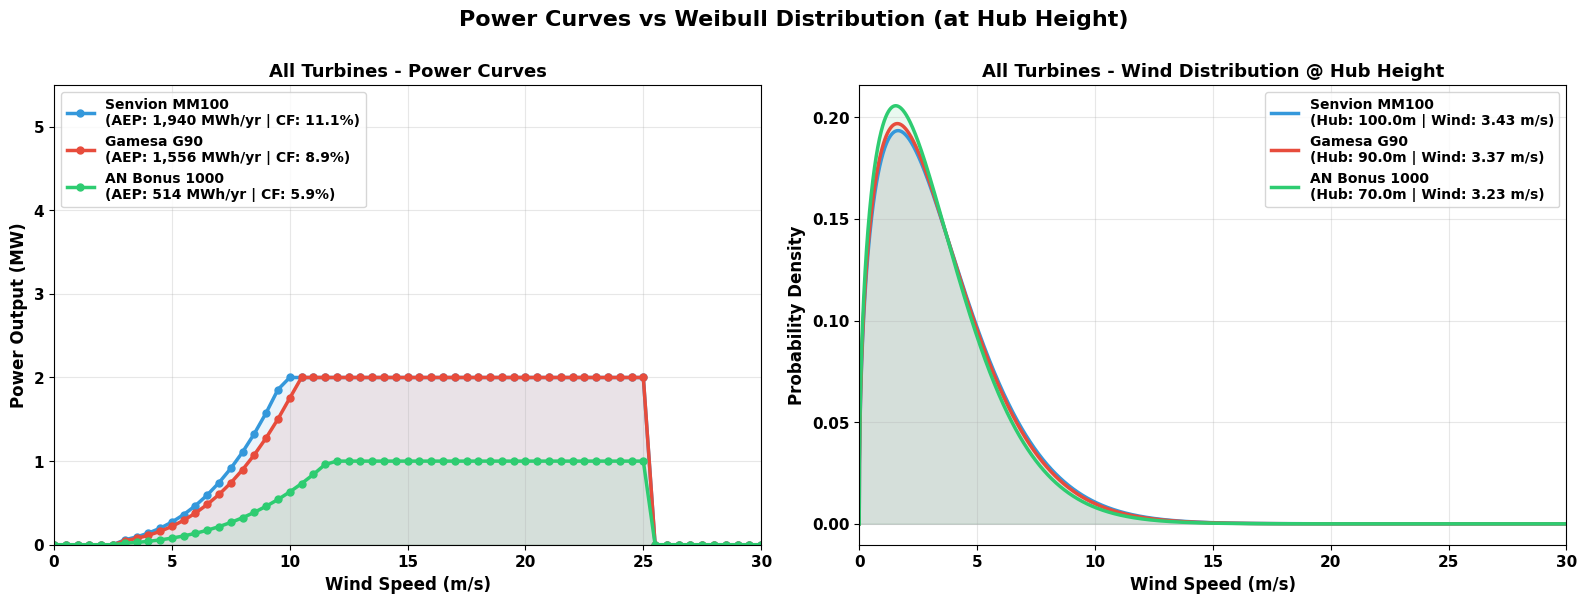


✓ Plot 1: All power curves vs Weibull distributions displayed


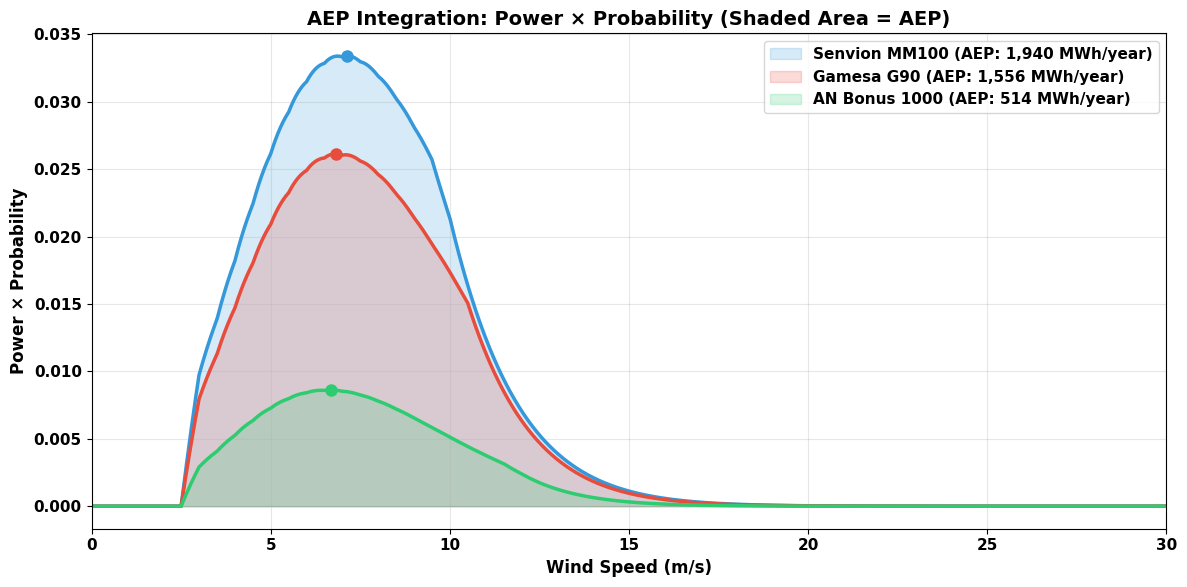

✓ Plot 2: AEP integration (all turbines overlaid) displayed


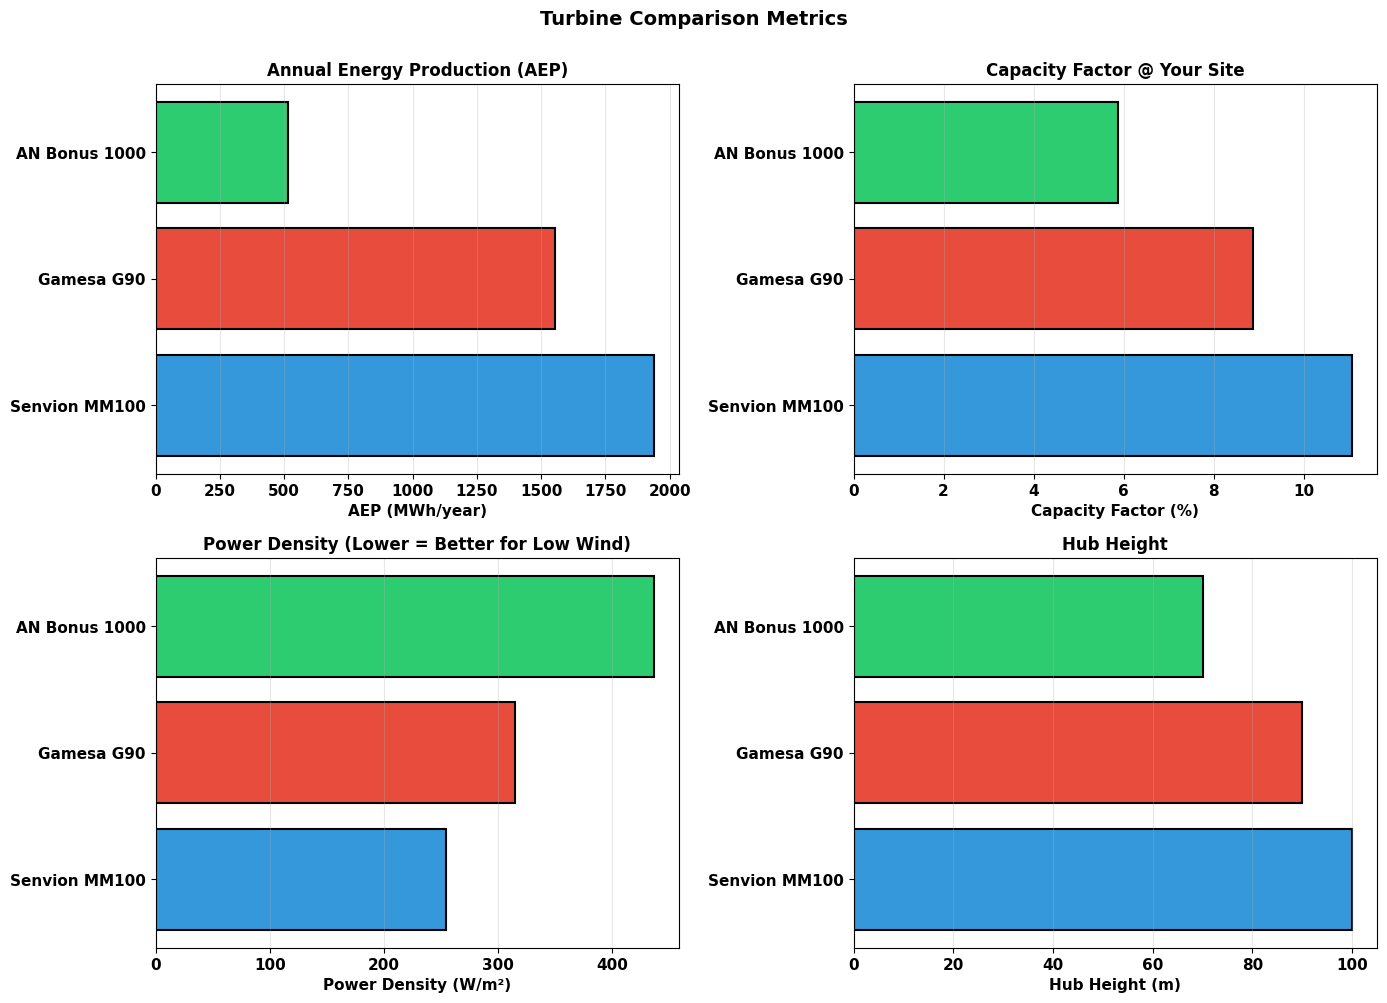

✓ Plot 3: Comparison metrics displayed

Exporting Results
--------------------------------------------------------------------------------
✓ Results saved: turbine_analysis_results.csv

✅ ANALYSIS COMPLETE

SUMMARY:
--------------------------------------------------------------------------------
1. Senvion MM100                       → AEP:    1,940 MWh/year | CF:  11.07%
2. Gamesa G90                          → AEP:    1,556 MWh/year | CF:   8.88%
3. AN Bonus 1000                       → AEP:      514 MWh/year | CF:   5.87%


In [24]:
"""
TURBINE ANALYSIS WITH POWER CURVES - JUPYTER NOTEBOOK COMPATIBLE (FIXED VERSION)
Reads from turbine_power_curves_newoct28_small.xlsx 
Visualizes: Power Curves vs Weibull Distribution overlaid (NO DUPLICATES)

FEATURES:
✓ Reads new Excel format
✓ Power curve integration with Weibull distribution
✓ JUPYTER COMPATIBLE - all plots display inline
✓ Power curves overlaid on one plot
✓ Weibull distributions overlaid on one plot
✓ AEP integration visualization
✓ No duplicate "Unified Blue" plots
"""

import pandas as pd
import numpy as np
from scipy.stats import weibull_min
from scipy import interpolate
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# FOR JUPYTER: Enable inline plotting
%matplotlib inline
import IPython.display as display

print("="*80)
print("TURBINE ANALYSIS WITH POWER CURVES - JUPYTER VERSION (FIXED)")
print("="*80)

# CONFIGURATION
selected_turbines = None

print("\nCONFIGURATION:")
print("-"*80)
if selected_turbines is None:
    print("✓ Analyzing ALL turbines found in Excel file")
else:
    print(f"✓ Analyzing specific turbines: {', '.join(selected_turbines)}")

# ============================================================
# SITE PARAMETERS
# ============================================================

print("\n" + "="*80)
print("SITE PARAMETERS & CORRECTIONS")
print("-"*80)

reference_height = 10
reference_altitude = 228
z0 = 0.25
farm_altitude = 437
altitude_difference = farm_altitude - reference_altitude
wind_speed_factor = 1.0

T_lapse_rate = 0.0065
T_sea_level = 288.15
g = 9.81
R_specific = 287
rho_sea_level = 1.225

T_ref = T_sea_level - T_lapse_rate * reference_altitude
rho_ref = rho_sea_level * (T_ref / T_sea_level) ** (g / (R_specific * T_lapse_rate))

T_farm = T_sea_level - T_lapse_rate * farm_altitude
rho_farm = rho_sea_level * (T_farm / T_sea_level) ** (g / (R_specific * T_lapse_rate))

rho_correction = rho_farm / rho_ref

print(f"""
REFERENCE: {reference_height}m, {reference_altitude}m ASL, z0={z0}m, ρ={rho_ref:.4f} kg/m³
FARM: {farm_altitude}m ASL, ρ={rho_farm:.4f} kg/m³, Correction: {rho_correction:.6f}
""")

# ============================================================
# WIND DATA
# ============================================================

print("\n" + "="*80)
print("STEP 1: Wind Data")
print("-"*80)

v_ref_measured = 2.1132
shape_ref = 1.4306
scale_ref = 2.3475

print(f"Wind @ 10m: {v_ref_measured:.4f} m/s, Weibull k={shape_ref:.4f}, A={scale_ref:.4f}")

# ============================================================
# LOAD EXCEL
# ============================================================

print("\n" + "="*80)
print("STEP 2: Reading Turbine Data from Excel")
print("-"*80)

excel_filename = "turbine_power_curves_newoct28_small.xlsx"
current_dir = os.getcwd()
excel_file = os.path.join(current_dir, excel_filename)

if not os.path.exists(excel_file):
    print(f"❌ Excel file not found: {excel_filename}")
    raise FileNotFoundError(f"Could not find {excel_filename}")

df_full = pd.read_excel(excel_file, sheet_name='All Turbines Comparison')

specs_df = df_full.iloc[3:6].reset_index(drop=True)
turbine_names = []
turbine_specs_dict = {}

for idx, row in specs_df.iterrows():
    turbine_name = str(row.iloc[0]).strip() if pd.notna(row.iloc[0]) else None
    
    if turbine_name and turbine_name != "":
        turbine_names.append(turbine_name)
        try:
            turbine_specs_dict[turbine_name] = {
                'Rated Power (MW)': float(row.iloc[1]),
                'Rotor Diameter (m)': float(row.iloc[2]),
                'Hub Height (m)': float(row.iloc[3]),
                'Cut-in (m/s)': float(row.iloc[4]),
                'Rated Speed (m/s)': float(row.iloc[5]),
            }
        except (ValueError, TypeError):
            pass

print(f"✓ Found {len(turbine_names)} turbine models: {', '.join(turbine_names)}")

power_curve_df = df_full.iloc[10:].reset_index(drop=True)

turbine_data = []

for turbine_idx, turbine_name in enumerate(turbine_names):
    if selected_turbines is not None and turbine_name not in selected_turbines:
        continue
    
    if turbine_name not in turbine_specs_dict:
        continue
    
    specs = turbine_specs_dict[turbine_name].copy()
    specs['Turbine'] = turbine_name
    
    rotor_area = np.pi * (specs['Rotor Diameter (m)'] / 2) ** 2
    specs['Power Density (W/m²)'] = (specs['Rated Power (MW)'] * 1e6) / rotor_area
    
    power_col_idx = turbine_idx + 1
    power_curve_v = []
    power_curve_p = []
    
    for idx, row in power_curve_df.iterrows():
        try:
            wind_speed = float(row.iloc[0])
            power_kw = row.iloc[power_col_idx]
            
            if pd.notna(power_kw) and power_kw != '':
                power_mw = float(power_kw) / 1000
                if 0 <= wind_speed <= 30 and 0 <= power_mw <= 50:
                    power_curve_v.append(wind_speed)
                    power_curve_p.append(power_mw)
        except (ValueError, TypeError, IndexError):
            pass
    
    if power_curve_v and power_curve_p:
        specs['power_curve_v'] = np.array(power_curve_v)
        specs['power_curve_p'] = np.array(power_curve_p)
        turbine_data.append(specs)
        print(f"✓ Loaded: {turbine_name} ({len(power_curve_v)} points)")

print(f"✓ Successfully loaded {len(turbine_data)} turbines")

# ============================================================
# WIND SHEAR SCALING
# ============================================================

print("\n" + "="*80)
print("STEP 3: Wind Shear Scaling to Hub Heights")
print("-"*80)

results = []

for turbine in turbine_data:
    hub_height = turbine['Hub Height (m)']
    v_hub_farm = v_ref_measured * wind_speed_factor * (np.log(hub_height / z0) / np.log(reference_height / z0))
    scale_hub = scale_ref * (v_hub_farm / v_ref_measured)
    
    results.append({
        'Turbine': turbine['Turbine'],
        'Rated Power (MW)': turbine['Rated Power (MW)'],
        'Hub Height (m)': hub_height,
        'Rotor Diameter (m)': turbine['Rotor Diameter (m)'],
        'Power Density (W/m²)': turbine['Power Density (W/m²)'],
        'Cut-in (m/s)': turbine.get('Cut-in (m/s)', 3.0),
        'Rated Speed (m/s)': turbine.get('Rated Speed (m/s)', 12.0),
        'v_hub_farm (m/s)': v_hub_farm,
        'Weibull A @ Hub (m/s)': scale_hub,
        'power_curve_v': turbine['power_curve_v'],
        'power_curve_p': turbine['power_curve_p'],
    })

# ============================================================
# AEP CALCULATION
# ============================================================

print("\n" + "="*80)
print("STEP 4: Calculating AEP")
print("-"*80)

for result in results:
    v_curve = result['power_curve_v']
    p_curve = result['power_curve_p']
    
    f_power = interpolate.interp1d(v_curve, p_curve, kind='linear', 
                                   bounds_error=False, fill_value=0)
    
    v_array = np.linspace(0, 30, 3001)
    p_array = f_power(v_array)
    pdf_array = weibull_min.pdf(v_array, shape_ref, scale=result['Weibull A @ Hub (m/s)'])
    integrand = p_array * pdf_array
    
    aep_raw = trapezoid(integrand, v_array) * 8760
    aep_corrected = aep_raw * rho_correction
    
    result['AEP Raw (MWh/year)'] = aep_raw
    result['AEP Corrected (MWh/year)'] = aep_corrected
    result['CF Corrected (%)'] = (aep_corrected / (result['Rated Power (MW)'] * 8760)) * 100
    result['Avg Power (MW)'] = aep_corrected / 8760
    result['v_array'] = v_array
    result['p_array'] = p_array
    result['pdf_array'] = pdf_array
    result['integrand'] = integrand

results_df = pd.DataFrame(results)

# ============================================================
# PRINT RESULTS
# ============================================================

print("\n" + "="*80)
print("AEP RANKING")
print("-"*80)

aep_ranking = results_df[['Turbine', 'AEP Corrected (MWh/year)', 'CF Corrected (%)']].sort_values('AEP Corrected (MWh/year)', ascending=False)
print(aep_ranking.to_string(index=False))

# ============================================================
# VISUALIZATIONS - NO DUPLICATES, OVERLAID PLOTS ONLY
# ============================================================

print("\n" + "="*80)
print("STEP 5: Creating Visualizations")
print("-"*80)

colors = ['#3498db', '#e74c3c', '#2ecc71']

# ============================================================
# PLOT 1: ALL POWER CURVES + ALL WEIBULL (OVERLAID)
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: All Power Curves Overlaid
for idx, (_, result) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows()):
    turbine_name = result['Turbine']
    aep = result['AEP Corrected (MWh/year)']
    cf = result['CF Corrected (%)']
    label = f"{turbine_name}\n(AEP: {aep:,.0f} MWh/yr | CF: {cf:.1f}%)"
    
    ax1.plot(result['power_curve_v'], result['power_curve_p'], 'o-', 
             linewidth=2.5, markersize=5, label=label, color=colors[idx % len(colors)])
    ax1.fill_between(result['power_curve_v'], result['power_curve_p'], 
                     alpha=0.1, color=colors[idx % len(colors)])

ax1.set_xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Power Output (MW)', fontweight='bold', fontsize=12)
ax1.set_title('All Turbines - Power Curves', fontweight='bold', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10, loc='upper left')
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 5.5)

# Right: All Weibull Distributions Overlaid
for idx, (_, result) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows()):
    turbine_name = result['Turbine']
    hub_height = result['Hub Height (m)']
    v_hub = result['v_hub_farm (m/s)']
    label = f"{turbine_name}\n(Hub: {hub_height}m | Wind: {v_hub:.2f} m/s)"
    
    ax2.plot(result['v_array'], result['pdf_array'], 
             linewidth=2.5, label=label, color=colors[idx % len(colors)])
    ax2.fill_between(result['v_array'], result['pdf_array'], 
                     alpha=0.1, color=colors[idx % len(colors)])

ax2.set_xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Probability Density', fontweight='bold', fontsize=12)
ax2.set_title('All Turbines - Wind Distribution @ Hub Height', fontweight='bold', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='upper right')
ax2.set_xlim(0, 30)

fig.suptitle('Power Curves vs Weibull Distribution (at Hub Height)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()
print("\n✓ Plot 1: All power curves vs Weibull distributions displayed")

# ============================================================
# PLOT 2: AEP INTEGRATION (ALL TURBINES OVERLAID)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 6))

for idx, (_, result) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows()):
    turbine_name = result['Turbine']
    aep = result['AEP Corrected (MWh/year)']
    
    label = f"{turbine_name} (AEP: {aep:,.0f} MWh/year)"
    
    ax.fill_between(result['v_array'], result['integrand'], alpha=0.2, color=colors[idx % len(colors)], 
                     label=label)
    ax.plot(result['v_array'], result['integrand'], color=colors[idx % len(colors)], linewidth=2.5)
    
    peak_idx = np.argmax(result['integrand'])
    peak_v = result['v_array'][peak_idx]
    peak_val = result['integrand'][peak_idx]
    ax.plot(peak_v, peak_val, 'o', markersize=8, color=colors[idx % len(colors)])

ax.set_xlabel('Wind Speed (m/s)', fontweight='bold', fontsize=12)
ax.set_ylabel('Power × Probability', fontweight='bold', fontsize=12)
ax.set_title('AEP Integration: Power × Probability (Shaded Area = AEP)', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='upper right')
ax.set_xlim(0, 30)

plt.tight_layout()
plt.show()
print("✓ Plot 2: AEP integration (all turbines overlaid) displayed")

# ============================================================
# PLOT 3: COMPARISON METRICS
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 3A: AEP
ax = axes[0, 0]
turbines_sorted = results_df.sort_values('AEP Corrected (MWh/year)', ascending=False)
ax.barh(turbines_sorted['Turbine'], turbines_sorted['AEP Corrected (MWh/year)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('AEP (MWh/year)', fontweight='bold')
ax.set_title('Annual Energy Production (AEP)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Plot 3B: Capacity Factor
ax = axes[0, 1]
ax.barh(turbines_sorted['Turbine'], turbines_sorted['CF Corrected (%)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Capacity Factor (%)', fontweight='bold')
ax.set_title('Capacity Factor @ Your Site', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Plot 3C: Power Density
ax = axes[1, 0]
ax.barh(turbines_sorted['Turbine'], turbines_sorted['Power Density (W/m²)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Power Density (W/m²)', fontweight='bold')
ax.set_title('Power Density (Lower = Better for Low Wind)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Plot 3D: Hub Height
ax = axes[1, 1]
ax.barh(turbines_sorted['Turbine'], turbines_sorted['Hub Height (m)'], 
        color=colors[:len(turbines_sorted)], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Hub Height (m)', fontweight='bold')
ax.set_title('Hub Height', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Turbine Comparison Metrics', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()
print("✓ Plot 3: Comparison metrics displayed")

# ============================================================
# EXPORT
# ============================================================

print("\n" + "="*80)
print("Exporting Results")
print("-"*80)

results_display = results_df[['Turbine', 'Rated Power (MW)', 'Hub Height (m)', 
                              'Power Density (W/m²)', 'AEP Corrected (MWh/year)', 'CF Corrected (%)']].copy()
results_display.to_csv('turbine_analysis_results.csv', index=False)
print("✓ Results saved: turbine_analysis_results.csv")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)
print("\nSUMMARY:")
print("-"*80)
for rank, (idx, row) in enumerate(results_df.sort_values('AEP Corrected (MWh/year)', ascending=False).iterrows(), 1):
    print(f"{rank}. {row['Turbine']:35s} → AEP: {row['AEP Corrected (MWh/year)']:>8,.0f} MWh/year | CF: {row['CF Corrected (%)']:>6.2f}%")